In [1]:
import imp
import uproot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
helper = imp.load_source('helpfunction','/home/tmettler/Desktop/uBoone/do_plots/helpfunction.py')
#import /home/tmettler/Desktop/uBoone/do_plots/helpfunction as helper
from __future__ import division

import collections
NuCC = imp.load_source('NuCC_function','/home/tmettler/Desktop/uBoone/do_plots/NuCC_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [3]:
# Load input files

inputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/'
#inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'

outputdir = inputdir+'NumuCC_crtcut/' 
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V18_V33.root'
filename_data = 'NuCCana_data_V16_V33.root'
filename_ext = 'NuCCana_ext_V16_V33.root'
filename_dirt = 'NuCCana_dirt_V18_V33.root'

'''filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root' '''
    
tree_name = 'numuCCAna'

In [4]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)

#pot_data =      2.494e+17 # tor860_wcut
#data_trigger = 59914.0 #4743794 # 1987072.0 # E1DCNT_wcut
#ext_trigger =  3647231.0  #2120135 #5685315 # EXT

pot_data =     8.057e+18 # tor875_wcut
data_trigger = 1942081.0 # E1DCNT
ext_trigger =  25882118.0  #2120135 #5685315 # EXT

'''pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT
'''

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	967268
Data: Number of Entries:	34835
Ext: Number of Entries:		302778
Dirt: Number of Entries:	96465

POT: 
Data:		8.057e+18
Ext:		0
Overlay:	1.21191661343e+21
Dirt:		2.95232189919e+20

Scalefactors: 
Data:		1.0
Ext:		0.0750356288461
Overlay:	0.0066481471668
Dirt:		0.0272903845689


In [5]:
if 1:
    filename_overlay = 'NuCCana_overlay_V18_V33.rootout33.root'
    filename_data = 'NuCCana_data_V16_V33.rootout33.root'
    filename_ext = 'NuCCana_ext_V16_V33.rootout33.root'
    filename_dirt = 'NuCCana_dirt_V18_V33.rootout33.root'
    
    '''filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'
'''
    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	967267
Data: Number of Entries:	34834
Ext: Number of Entries:		302777
Dirt: Number of Entries:	96464



In [6]:
#scale_out[data_out] = 1/35.0
#scale[data] = 1/35.0

#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()
#cut = 'key_muprotratio==track_key && fidVol'
#NuCC.make_stacked_histo_plot_out(cut,'TrackLength','Track Length',0,500,50,'TrackLength_stag.png')

In [7]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [8]:
for x in sample_out:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    #x.SetAlias('muon','(key_muprotratio==track_key)')
    
num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    #num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
#tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
#overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
# Load the global variables for access of functions

NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [10]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

First mean: -1.01808689655
First std: 0.494561834689
First mean: 0.00789191260827
First std: 0.528983485008
First mean: -0.318413272396
First std: 0.616701639747
 FCN=120844 FROM MIGRAD    STATUS=CONVERGED     116 CALLS         117 TOTAL
                     EDM=2.72815e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.16666e+04   3.55259e+01   4.03293e-01  -1.21852e-05
   2  Mean        -1.01809e+00   8.23021e-04   5.32246e-06   7.28909e-01
   3  Sigma        4.94562e-01   1.26107e-03  -5.76058e-06  -2.57879e+00
 FCN=128377 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=4.27451e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIV

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/png/h_pos_Vx.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/root/h_pos_Vx.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/png/h_pos_Vy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/root/h_pos_Vy.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/png/h_pos_Vz.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08

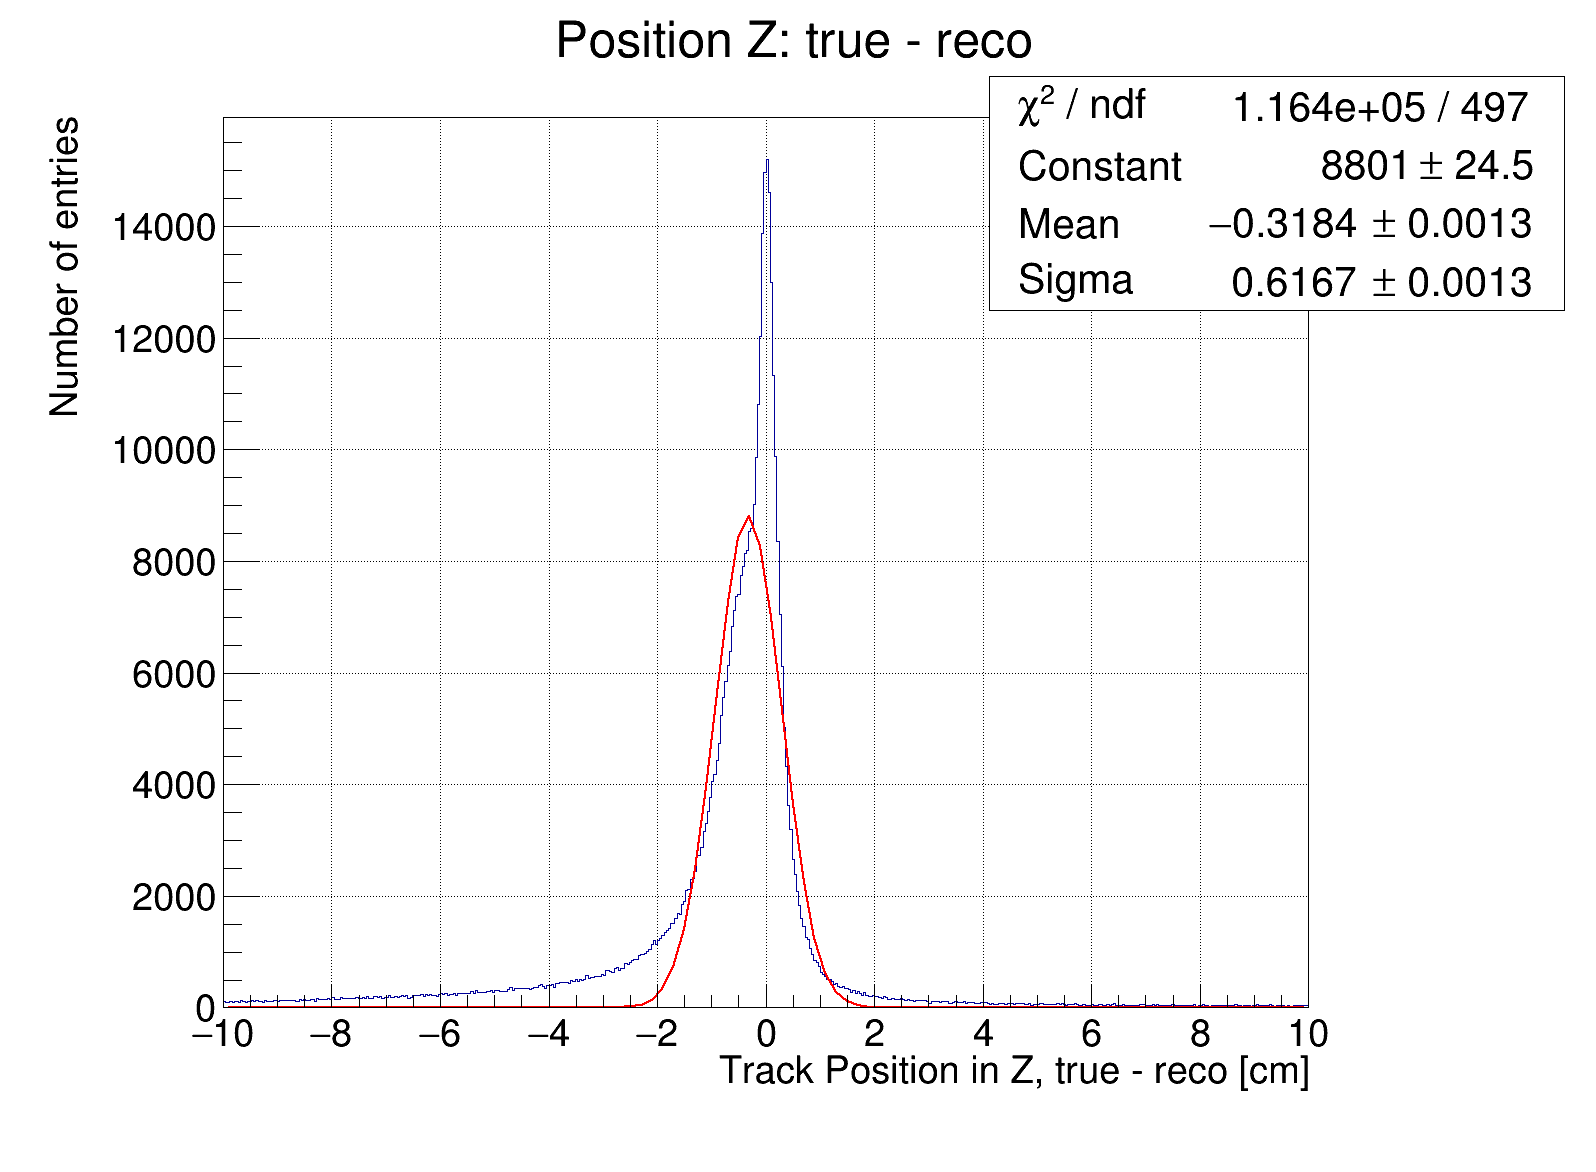

In [12]:
title = 'Position X: true - reco'
name = 'Vx'
xstart = -10
xend = 10
xbin = 500

ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx-TrackStart_x_sce>>h_pos','MCNu_Vz!=-999 && fidVol')
h_pos.SetXTitle("Track Position in X, true - reco [cm]")
h_pos.SetYTitle("Number of entries")
f1 = ROOT.TF1("f1","gaus",xstart,xend)
h_pos.Fit("f1","R");
print 'First mean:', f1.GetParameter(1)
print 'First std:', f1.GetParameter(2)
h_pos.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

title = 'Position Y: true - reco'
name = 'Vy'
xstart = -10
xend = 10
xbin = 500
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy-TrackStart_y_sce>>h_pos','MCNu_Vz!=-999  && fidVol')
h_pos.SetXTitle("Track Position in Y, true - reco [cm]")
h_pos.SetYTitle("Number of entries")
f1 = ROOT.TF1("f1","gaus",xstart,xend)
h_pos.Fit("f1","R");
print 'First mean:', f1.GetParameter(1)
print 'First std:', f1.GetParameter(2)
h_pos.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

title = 'Position Z: true - reco'
name = 'Vz'
xstart = -10
xend = 10
xbin = 500
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz-TrackStart_z_sce>>h_pos','MCNu_Vz!=-999 && fidVol')
h_pos.SetXTitle("Track Position in Z, true - reco [cm]")
h_pos.SetYTitle("Number of entries")
f1 = ROOT.TF1("f1","gaus",xstart,xend)
h_pos.Fit("f1","R");
print 'First mean:', f1.GetParameter(1)
print 'First std:', f1.GetParameter(2)
h_pos.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

'title = \'True Lepton Energy - Momentum by range over Track Length [GeV/cm]\'\nh_pos = ROOT.TProfile("h_pos", title, xbin,xstart,xend)\noverlay.Draw(\'MCle_Energy-TrackMomRange_mu:TrackLength>>h_pos\',cut,\'profz\')\nh_pos.SetXTitle("Track length [cm]")\nh_pos.SetYTitle("True - Range Momentum")\n\nh_pos.Draw(\'\')\nc1.Draw()\nc1.SaveAs(outputdir_png + "h_range_tracklength.png")\nc1.SaveAs(outputdir_root + "h_range_tracklength.root")'

Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_MCS_tracklength.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_MCS_tracklength.root has been created


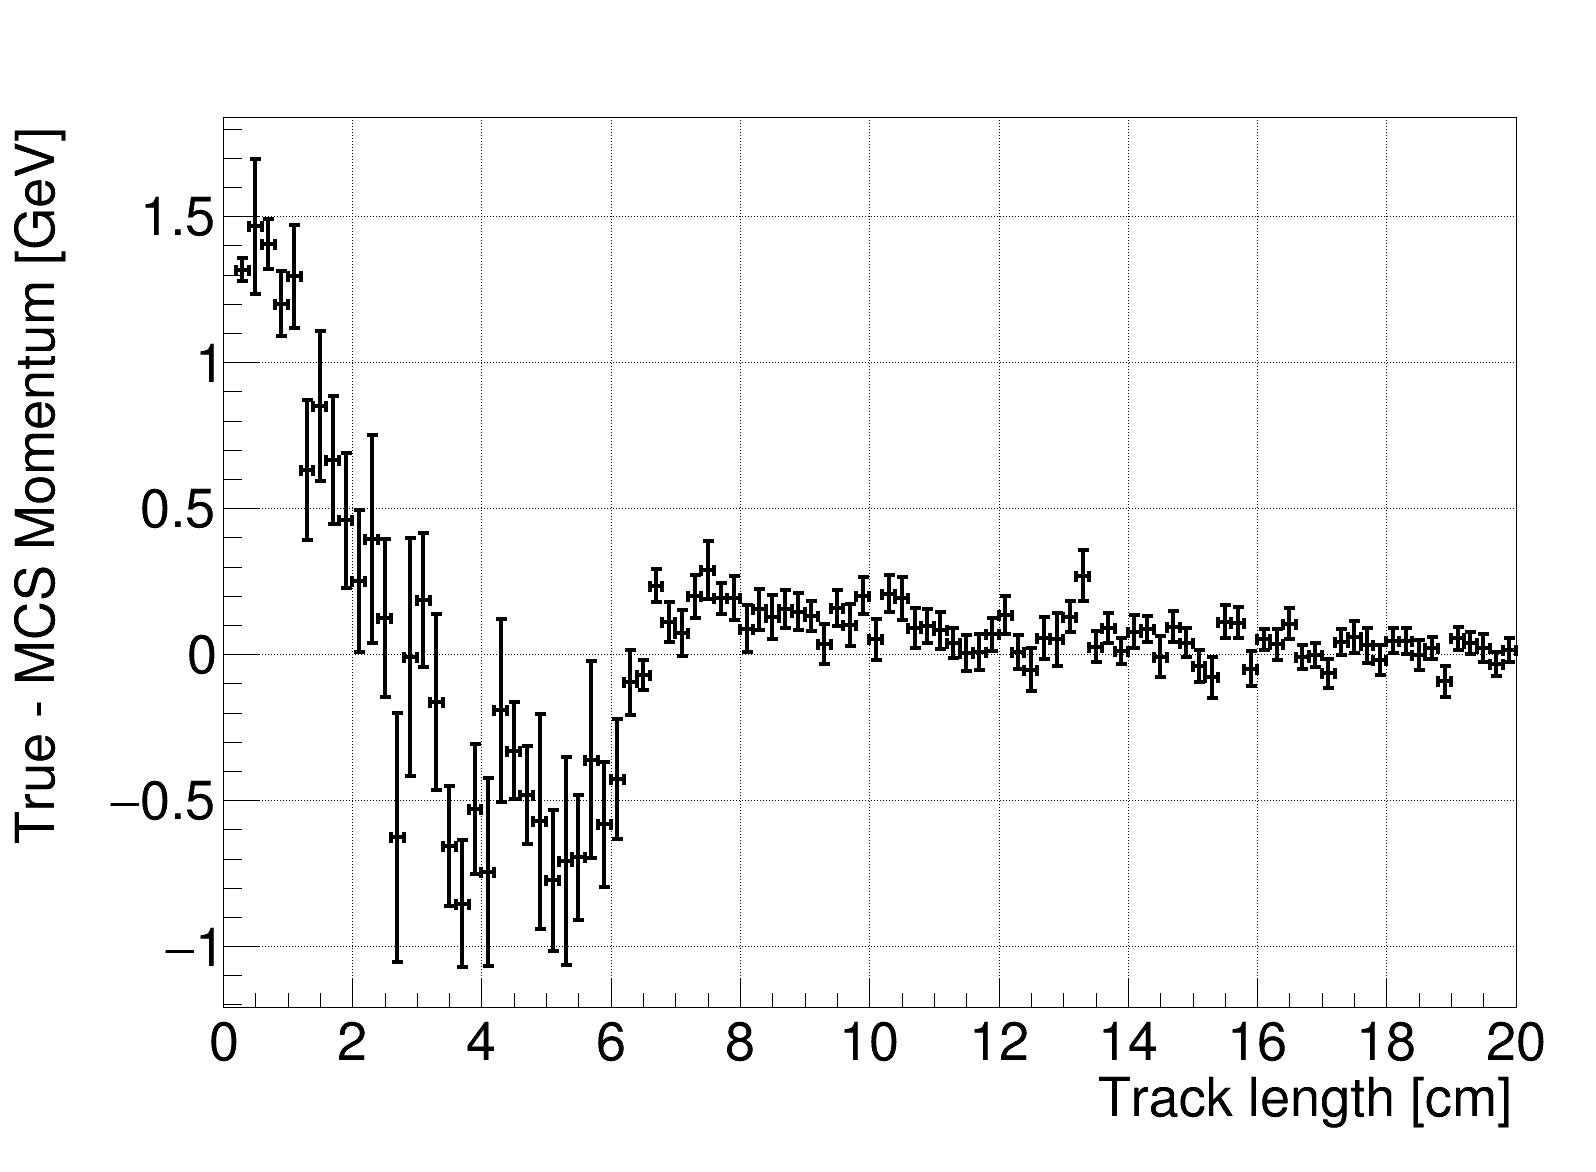

In [23]:
title = 'True Lepton Energy - MCS over Track Length [GeV/cm]'
xstart = 0
xend = 20
xbin = 100
ystart = -1
yend = 1
ybin = 100
cut = 'TrackMomMCS_mom<6 && fidVol && MCle_PDG==13'
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetOptTitle(0)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)
#h_pos = ROOT.TH2F("h_pos",title,xbin,xstart,xend,ybin, ystart, yend)
#h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
h_pos = ROOT.TProfile("h_pos", title, xbin,xstart,xend)
overlay.Draw('MCle_Energy-TrackMomMCS_mom:TrackLength>>h_pos',cut,'profz')
h_pos.SetXTitle("Track length [cm]")
h_pos.SetYTitle("True - MCS Momentum [GeV]")

h_pos.GetYaxis().SetTitleSize(0.05)
h_pos.GetYaxis().SetTitleOffset(0.0)
h_pos.GetYaxis().SetLabelSize(0.05)

h_pos.GetXaxis().SetTitleSize(0.05)
h_pos.GetXaxis().SetLabelSize(0.05)
h_pos.GetXaxis().SetTitleOffset(1)

h_pos.SetLineColor(ROOT.kBlack)
h_pos.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_pos.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_MCS_tracklength.png")
c1.SaveAs(outputdir_root + "h_MCS_tracklength.root")

'''title = 'True Lepton Energy - Momentum by range over Track Length [GeV/cm]'
h_pos = ROOT.TProfile("h_pos", title, xbin,xstart,xend)
overlay.Draw('MCle_Energy-TrackMomRange_mu:TrackLength>>h_pos',cut,'profz')
h_pos.SetXTitle("Track length [cm]")
h_pos.SetYTitle("True - Range Momentum")

h_pos.Draw('')
c1.Draw()
c1.SaveAs(outputdir_png + "h_range_tracklength.png")
c1.SaveAs(outputdir_root + "h_range_tracklength.root")'''

Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_range_contained_tracklength.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_range_contained_tracklength.root has been created


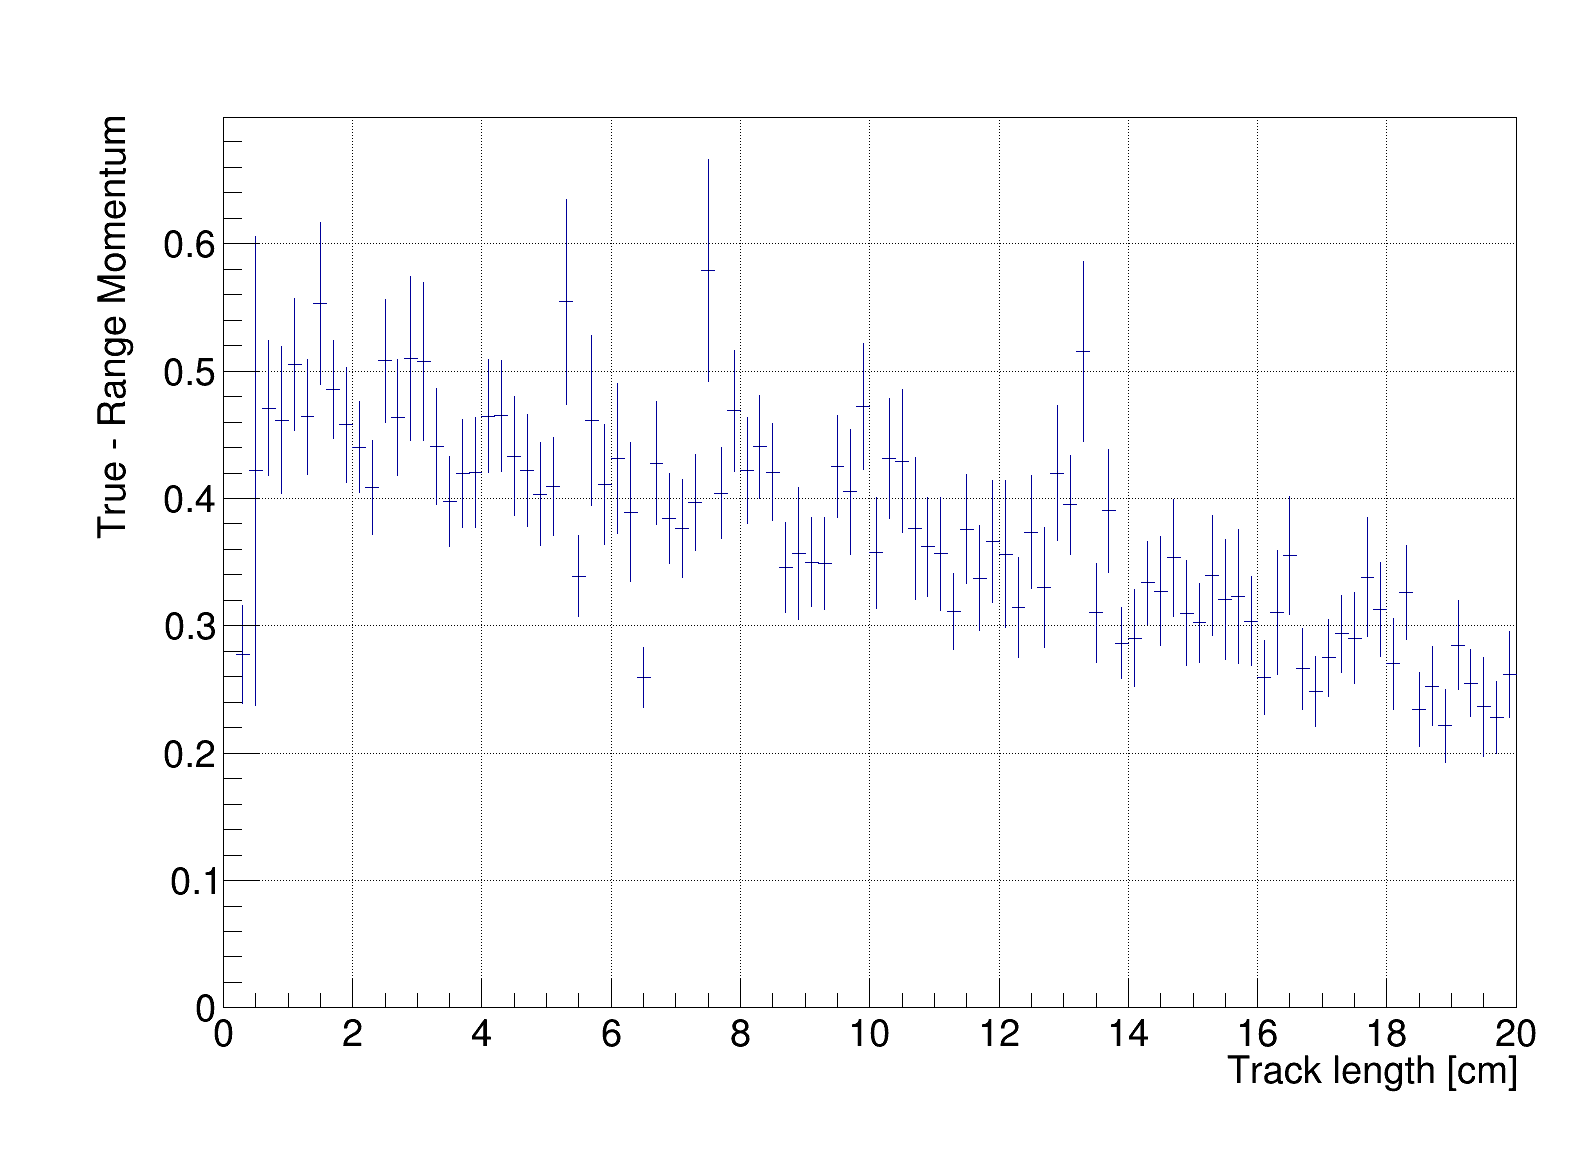

In [24]:
title = 'True Lepton Energy - Momentum by range over Track Length, contained[GeV/cm]'
h_pos = ROOT.TProfile("h_pos", title, xbin,xstart,xend)
overlay.Draw('MCle_Energy-TrackMomRange_mu:TrackLength>>h_pos','MCle_PDG==13 && TrackMomRange_mu<6 && !track_end_uncontained && fidVol','profz')
h_pos.SetXTitle("Track length [cm]")
h_pos.SetYTitle("True - Range Momentum")

h_pos.Draw('')
c1.Draw()
c1.SaveAs(outputdir_png + "h_range_contained_tracklength.png")
c1.SaveAs(outputdir_root + "h_range_contained_tracklength.root")

Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_pos_CRTX.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_pos_CRTX.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_ext (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_MC (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_pos_CRTY.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_pos_CRTY.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory l

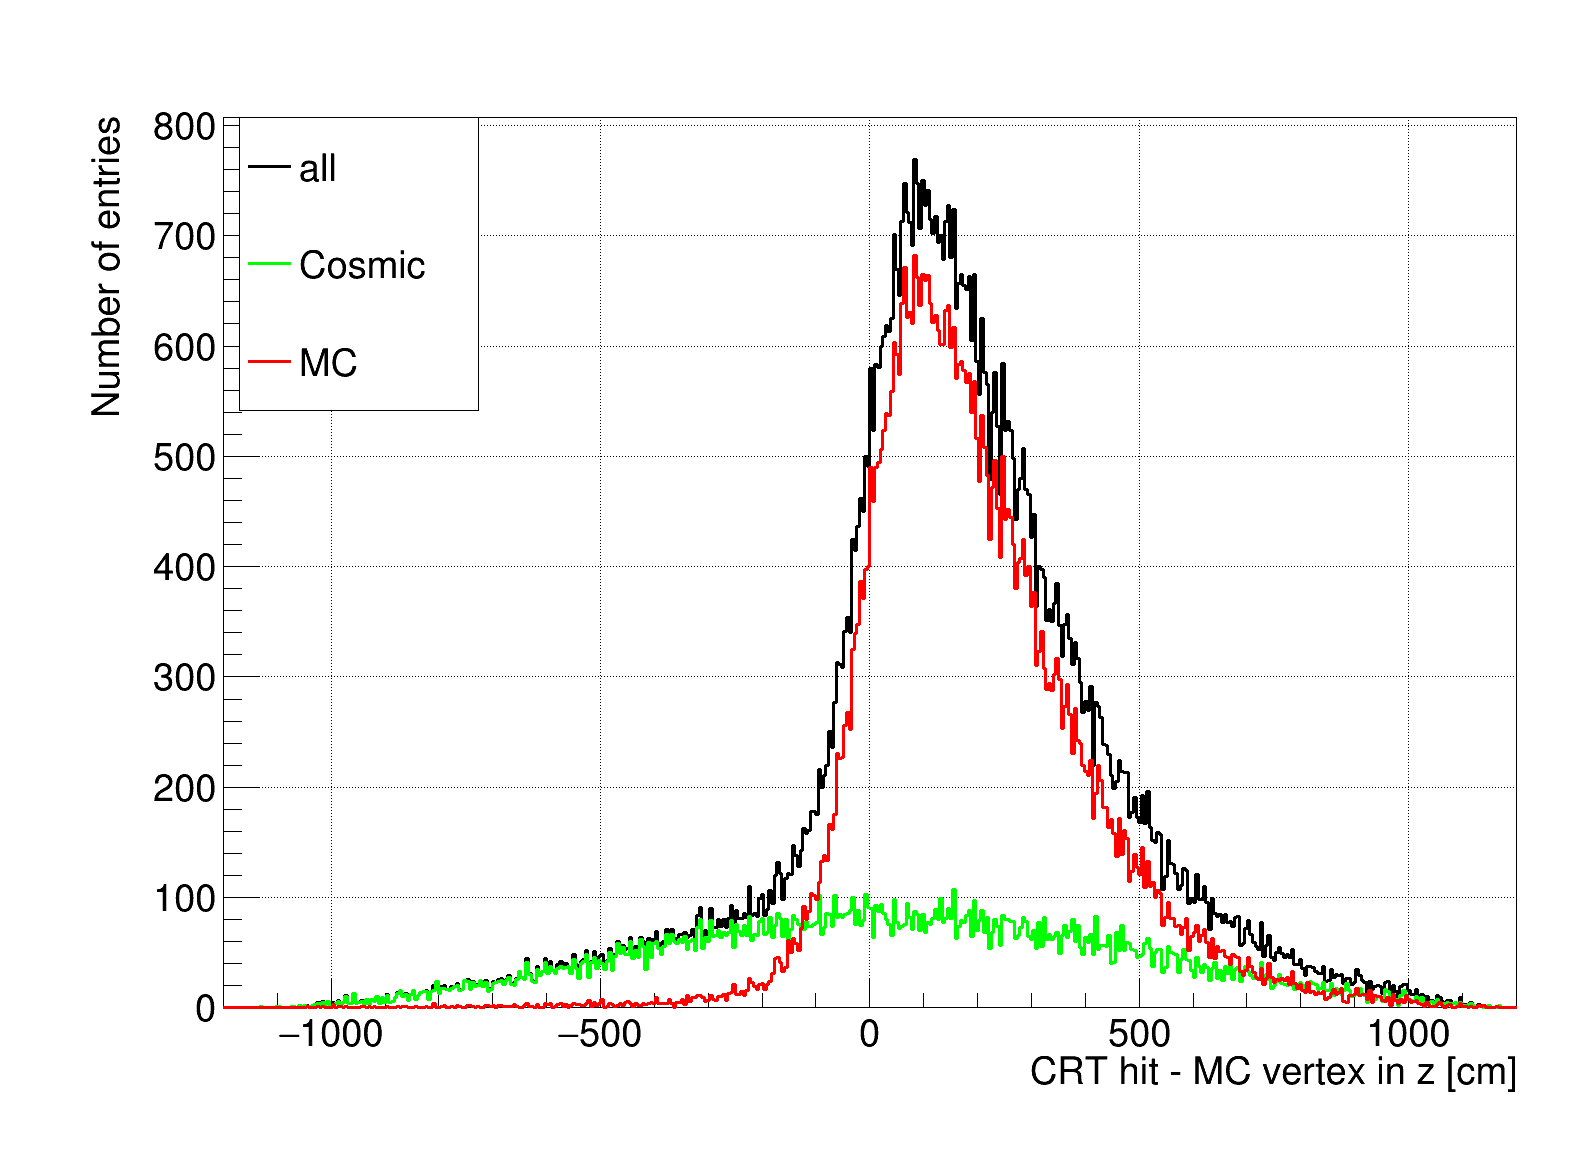

In [25]:
title = 'CRT Hit - MC Vertex position'
name = 'CRTX'
xstart = -600
xend = 600
xbin = 500
cut = 'fidVol && '
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
overlay.Draw('crthit_x-MCNu_Vx>>h_pos',cut+'1')
overlay.Draw('crthit_x-MCNu_Vx>>h_pos_ext',cut+'adc_length==32')
overlay.Draw('crthit_x-MCNu_Vx>>h_pos_MC',cut+'adc_length==2')
h_pos.SetXTitle("CRT hit - MC vertex in x [cm]")
h_pos.SetYTitle("Number of entries")
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_pos,"all","l");
legend.AddEntry(h_pos_ext,"Cosmic","l");
legend.AddEntry(h_pos_MC,"MC","l");
h_pos.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos.Draw()
h_pos_ext.Draw('same')
h_pos_MC.Draw('same')
legend.Draw('same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

name = 'CRTY'
xstart = -1200
xend = 1200
xbin = 500
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
overlay.Draw('crthit_y-MCNu_Vy>>h_pos',cut+'1')
overlay.Draw('crthit_y-MCNu_Vy>>h_pos_ext',cut+'adc_length==32')
overlay.Draw('crthit_y-MCNu_Vy>>h_pos_MC',cut+'adc_length==2')
h_pos.SetXTitle("CRT hit - MC vertex in y [cm]")
h_pos.SetYTitle("Number of entries")
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_pos,"all","l");
legend.AddEntry(h_pos_ext,"Cosmic","l");
legend.AddEntry(h_pos_MC,"MC","l");
h_pos.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos.Draw()
h_pos_ext.Draw('same')
h_pos_MC.Draw('same')
legend.Draw('same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

name = 'CRTZ'
xstart = -1200
xend = 1200
xbin = 500
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
overlay.Draw('crthit_z-MCNu_Vz>>h_pos',cut+'1')
overlay.Draw('crthit_z-MCNu_Vz>>h_pos_ext',cut+'adc_length==32')
overlay.Draw('crthit_z-MCNu_Vz>>h_pos_MC',cut+'adc_length==2')
h_pos.SetXTitle("CRT hit - MC vertex in z [cm]")
h_pos.SetYTitle("Number of entries")
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_pos,"all","l");
legend.AddEntry(h_pos_ext,"Cosmic","l");
legend.AddEntry(h_pos_MC,"MC","l");
h_pos.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos.Draw()
h_pos_ext.Draw('same')
h_pos_MC.Draw('same')
legend.Draw('same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_ext (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_MC (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_pos_CRTY_sides.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_pos_CRTY_sides.root has been created


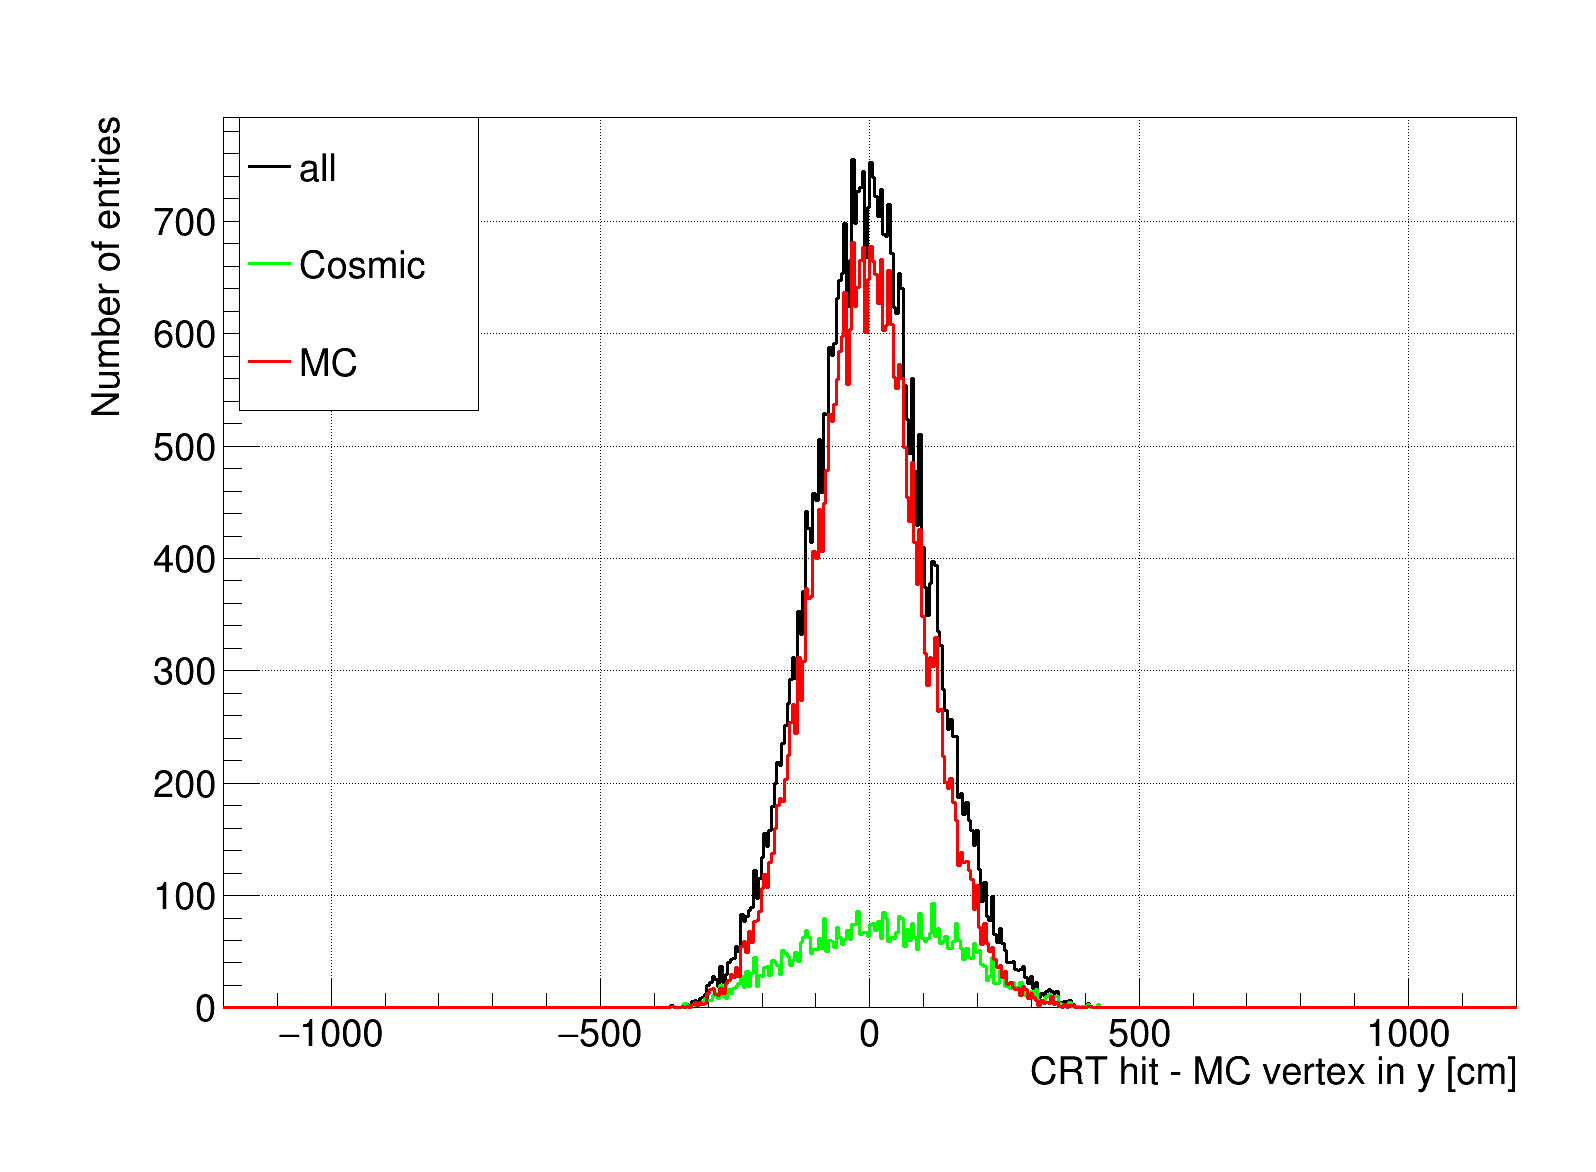

In [26]:
title = 'CRT Hit - MC Vertex position: Sides'

name = 'CRTY_sides'
xstart = -1200
xend = 1200
xbin = 500
cut = 'fidVol && (crt_plane==2 || crt_plane==1) && crt_adc>100 &&'
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
overlay.Draw('crthit_y-MCNu_Vy>>h_pos',cut+'1')
overlay.Draw('crthit_y-MCNu_Vy>>h_pos_ext',cut+'adc_length==32')
overlay.Draw('crthit_y-MCNu_Vy>>h_pos_MC',cut+'adc_length==2')
h_pos.SetXTitle("CRT hit - MC vertex in y [cm]")
h_pos.SetYTitle("Number of entries")
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_pos,"all","l");
legend.AddEntry(h_pos_ext,"Cosmic","l");
legend.AddEntry(h_pos_MC,"MC","l");
h_pos.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos.Draw()
h_pos_ext.Draw('same')
h_pos_MC.Draw('same')
legend.Draw('same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")


Warning in <TROOT::Append>: Replacing existing TH1: h_pos (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_ext (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_MC (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_pos_CRT_plane.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_pos_CRT_plane.root has been created


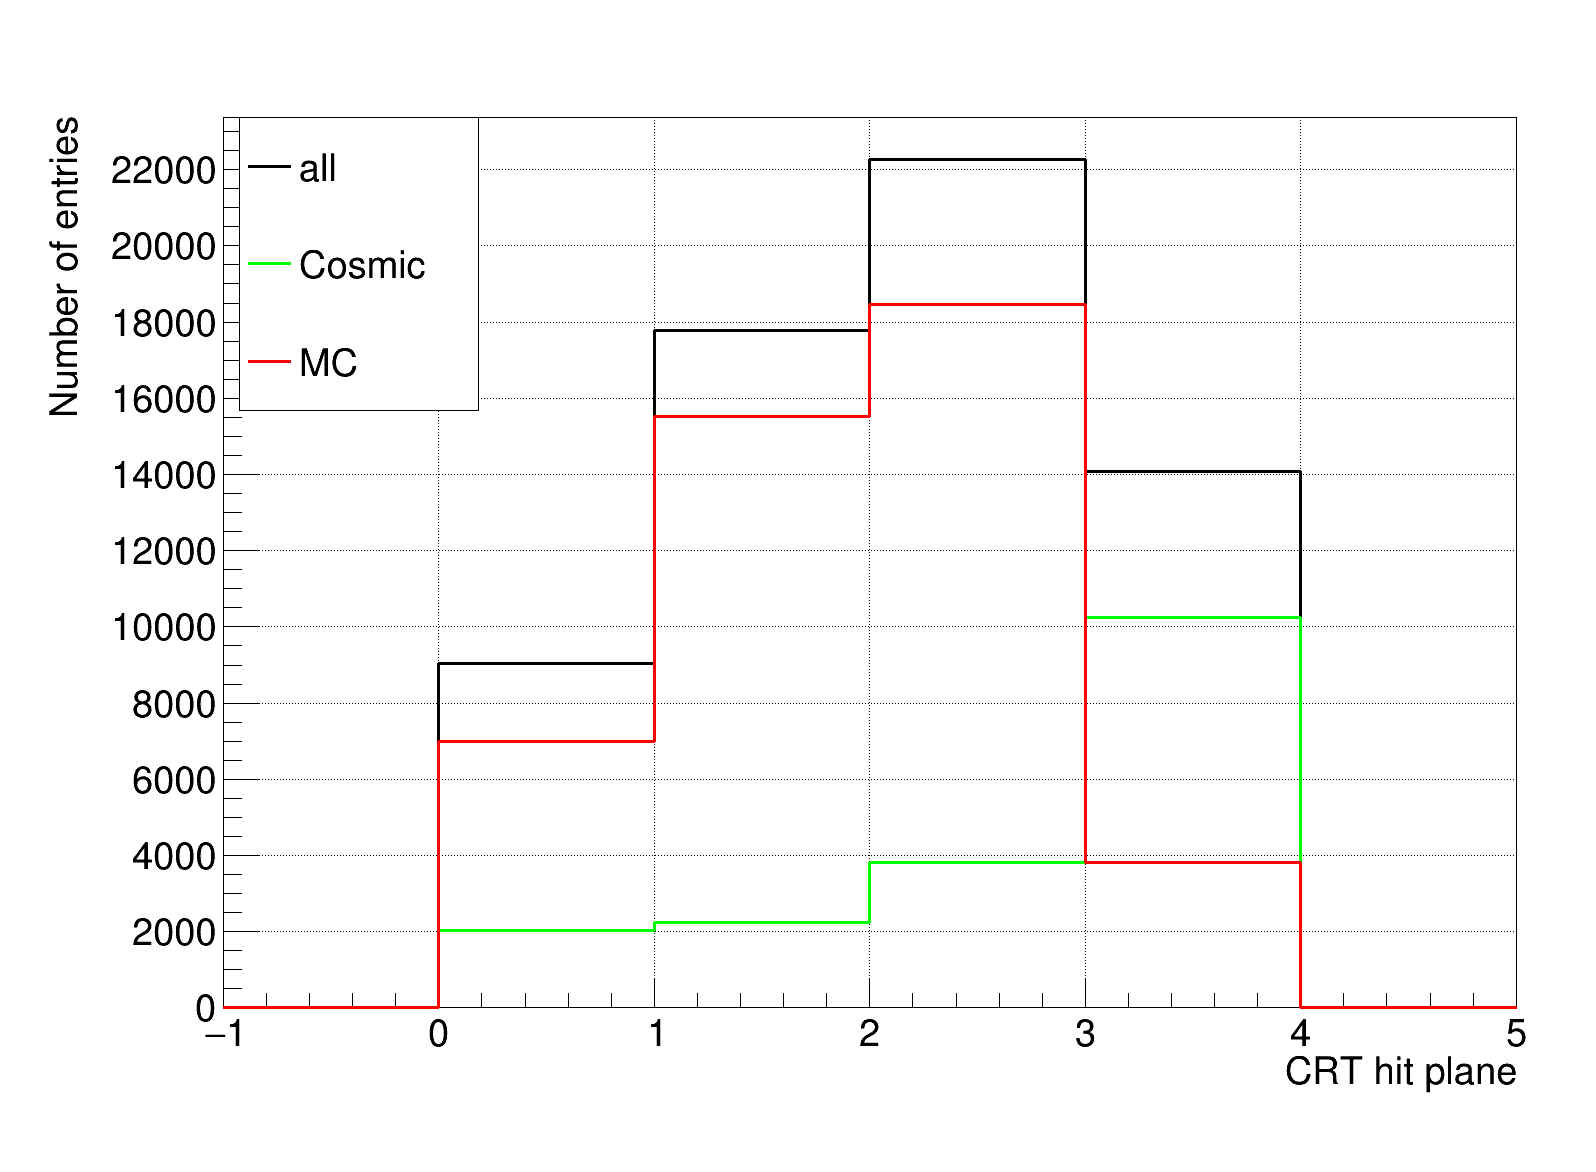

In [27]:
title = 'CRT Hit plane: overlay'

name = 'CRT_plane'
xstart = -1
xend = 5
xbin = 6
cut = 'fidVol && crt_adc>100 &&'
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos = ROOT.TH1F("h_pos",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
overlay.Draw('crt_plane>>h_pos',cut+'1')
overlay.Draw('crt_plane>>h_pos_ext',cut+'adc_length==32')
overlay.Draw('crt_plane>>h_pos_MC',cut+'adc_length==2')
h_pos.SetXTitle("CRT hit plane")
h_pos.SetYTitle("Number of entries")
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_pos,"all","l");
legend.AddEntry(h_pos_ext,"Cosmic","l");
legend.AddEntry(h_pos_MC,"MC","l");
h_pos.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos.Draw()
h_pos_ext.Draw('same')
h_pos_MC.Draw('same')
legend.Draw('same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")


Warning in <TROOT::Append>: Replacing existing TH1: h_pos_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_ext (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_dirt (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//png/h_pos_CRT_plane_samples_contained.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NumuCC_crtcut//root/h_pos_CRT_plane_samples_contained.root has been created


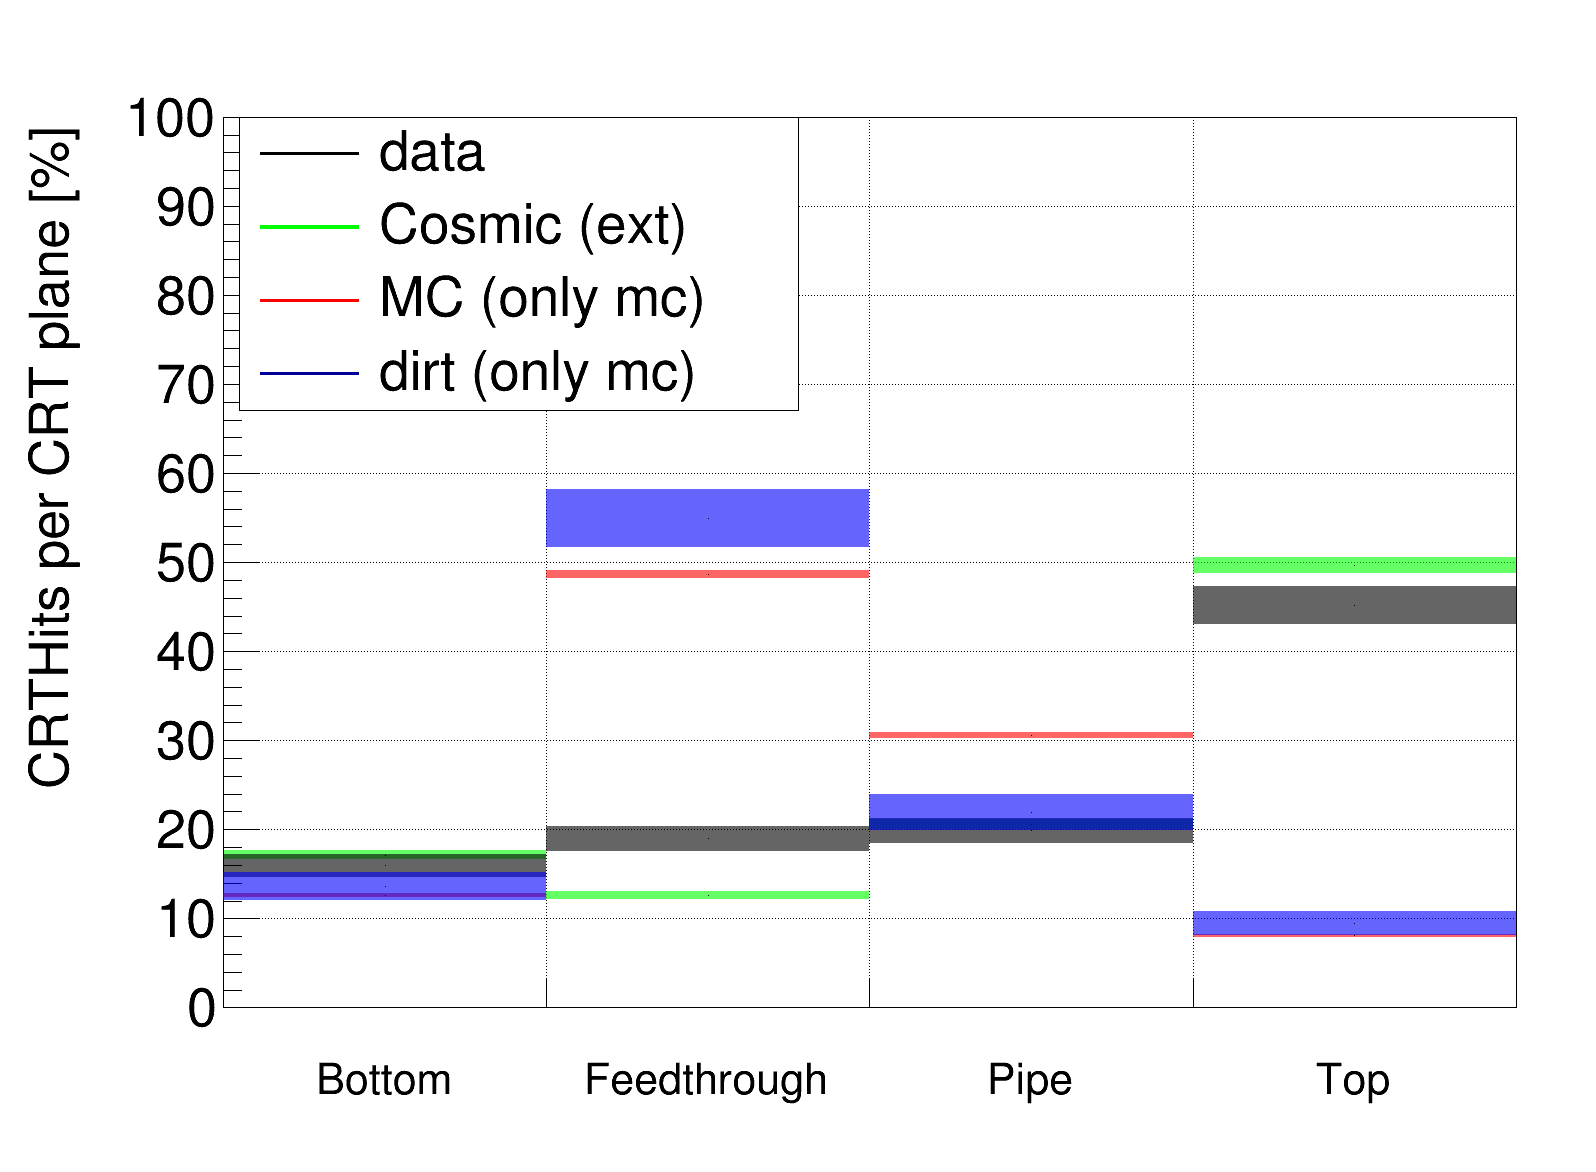

In [33]:
title = 'CRT Hit: plane (0=Bot,1=Feed,2=Pipe,3=Top)'

name = 'CRT_plane_samples_contained'
xstart = 0
xend = 4
xbin = 4
#datasample = ext
cut = 'fidVol && crt_adc>100 && !track_end_uncontained &&'
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos_data = ROOT.TH1F("h_pos_data",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
h_pos_dirt = ROOT.TH1F("h_pos_dirt",title,xbin,xstart,xend)
data.Draw('crt_plane>>h_pos_data',cut+'1')
ext.Draw('crt_plane>>h_pos_ext',cut+'1')
overlay.Draw('crt_plane>>h_pos_MC',cut+'adc_length==2')
dirt.Draw('crt_plane>>h_pos_dirt',cut+'adc_length==2')
legend = ROOT.TLegend(0.15,0.65,0.5,0.9) # LEGEND LEFT
legend.AddEntry(h_pos_data,"data","l");
legend.AddEntry(h_pos_ext,"Cosmic (ext)","l");
legend.AddEntry(h_pos_MC,"MC (only mc)","l");
legend.AddEntry(h_pos_dirt,"dirt (only mc)","l");
h_pos_data.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos_data.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos_dirt.SetLineWidth(3)
#h_pos_data.Scale(1.0, "width")
h_pos_data.Scale(100.0/h_pos_data.Integral(), "width")
h_pos_ext.Scale(100.0/h_pos_ext.Integral(), "width")
h_pos_MC.Scale(100.0/h_pos_MC.Integral(), "width")
h_pos_dirt.Scale(100.0/h_pos_dirt.Integral(), "width");

h_pos_ext.GetYaxis().SetTitleSize(0.05)
h_pos_ext.GetYaxis().SetTitleOffset(0.0)
h_pos_ext.GetYaxis().SetLabelSize(0.05)

h_pos_ext.GetXaxis().SetTitleSize(0.05)
h_pos_ext.GetXaxis().SetLabelSize(0.05)
h_pos_ext.GetXaxis().SetTitleOffset(1)

h_pos_ext.SetLineColor(ROOT.kGreen)
h_pos_ext.SetLineWidth(4)

h_pos_ext.SetXTitle("Plane with CRT hit in beam window")
h_pos_ext.SetYTitle("CRTHits per CRT plane [%]")
h_pos_ext.GetXaxis().SetTitleOffset(-999)
h_pos_ext.GetXaxis().SetBinLabel(1, 'Bottom') #(0=Bot,1=Feed,2=Pipe,3=Top)
h_pos_ext.GetXaxis().SetBinLabel(2, 'Feedthrough')
h_pos_ext.GetXaxis().SetBinLabel(3, 'Pipe')
h_pos_ext.GetXaxis().SetBinLabel(4, 'Top')
h_pos_ext.GetXaxis().SetLabelOffset(0.02)
h_pos_ext.GetXaxis().SetLabelSize(0.06)
#ROOT.gStyle.SetEndErrorSize(5)

h_pos_ext.SetMinimum(0)
h_pos_ext.SetMaximum(100)
h_pos_ext.SetFillColorAlpha(ROOT.kGreen,0.6)
h_pos_data.SetFillColorAlpha(ROOT.kBlack,0.6)
h_pos_MC.SetFillColorAlpha(ROOT.kRed,0.6)
h_pos_dirt.SetFillColorAlpha(ROOT.kBlue,0.6)
h_pos_ext.Draw('E2')
h_pos_data.Draw('E2 same')
h_pos_MC.Draw('E2 same')
h_pos_dirt.Draw('E2 same')
legend.Draw('E2 same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

Warning in <TROOT::Append>: Replacing existing TH1: h_pos_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_ext (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_dirt (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_pos_CRTY_sides_sample.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_pos_CRTY_sides_sample.root has been created


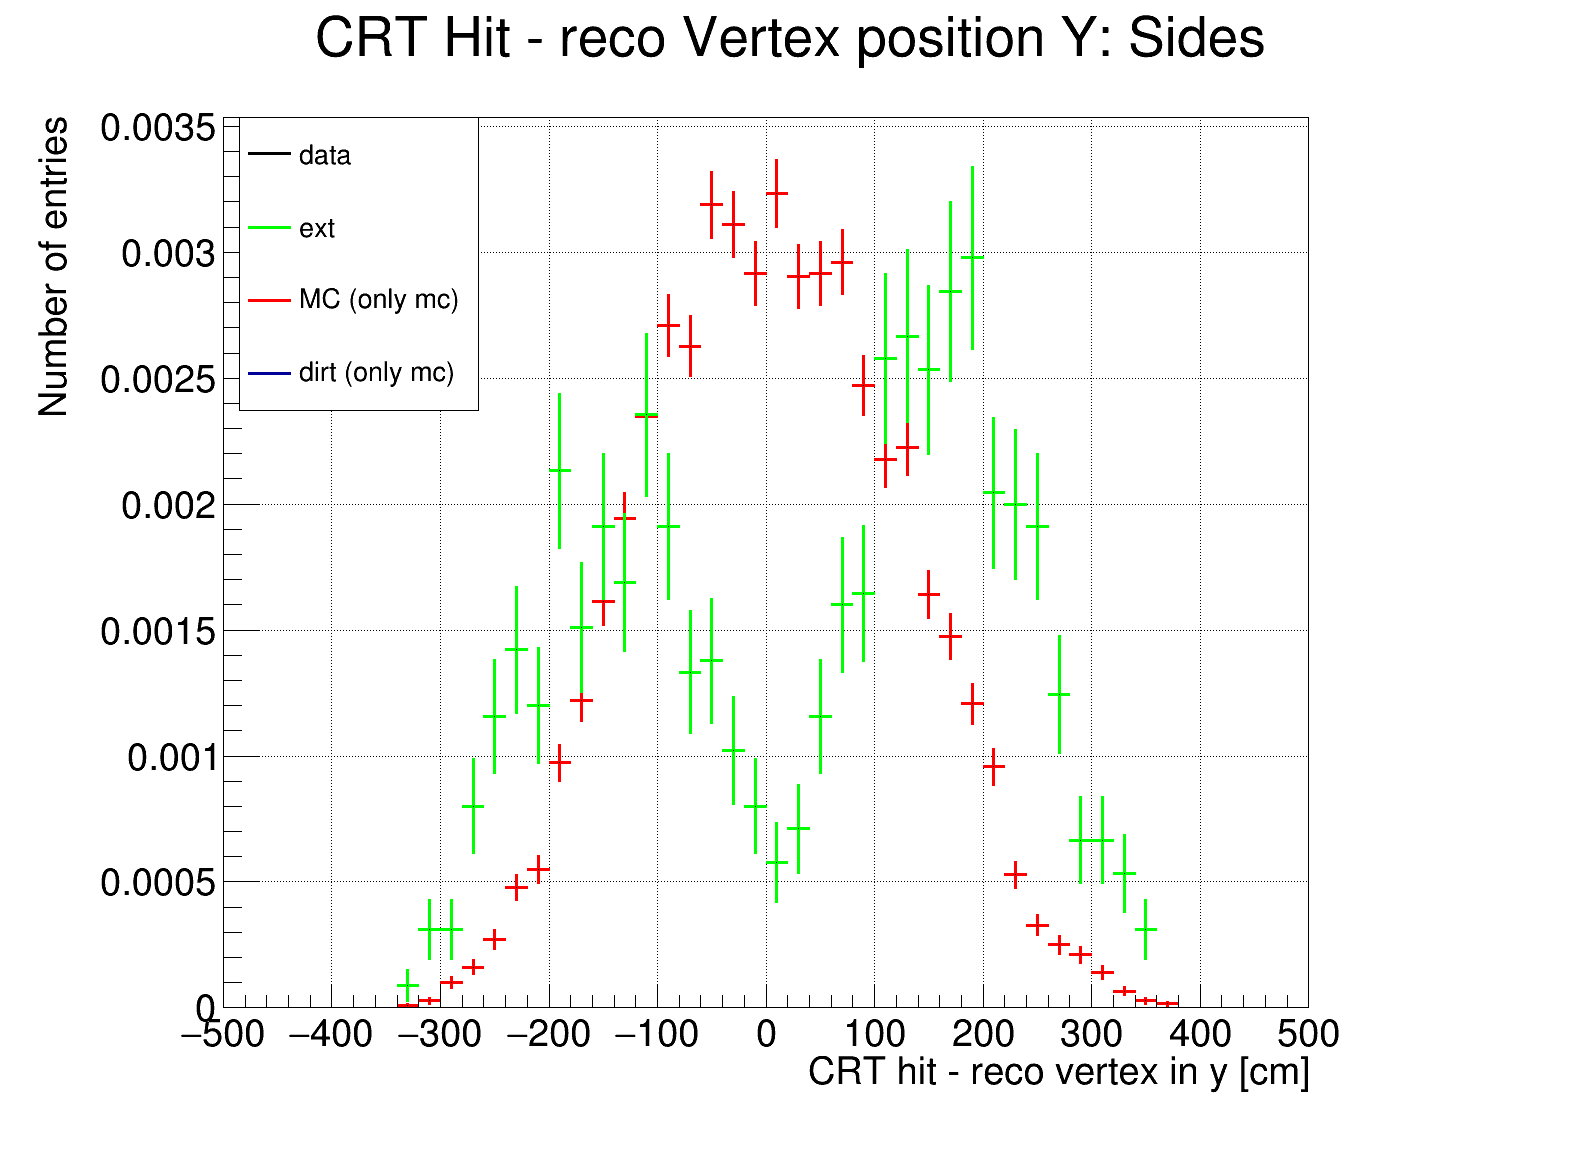

In [25]:
title = 'CRT Hit - reco Vertex position Y: Sides'

name = 'CRTY_sides_sample'
xstart = -500
xend = 500
xbin = 50
cut = 'fidVol && (crt_plane==2 || crt_plane==1) && crt_adc>100 && track_end_uncontained &&'
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos_data = ROOT.TH1F("h_pos_data",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
h_pos_dirt = ROOT.TH1F("h_pos_dirt",title,xbin,xstart,xend)
data.Draw('crthit_y-Nu_Vy_sce>>h_pos_data',cut+'1')
ext.Draw('crthit_y-Nu_Vy_sce>>h_pos_ext',cut+'1')
overlay.Draw('crthit_y-Nu_Vy_sce>>h_pos_MC',cut+'adc_length==2')
dirt.Draw('crthit_y-Nu_Vy_sce>>h_pos_dirt',cut+'adc_length==2')
h_pos_MC.SetXTitle("CRT hit - reco vertex in y [cm]")
h_pos_MC.SetYTitle("Number of entries")
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
legend.AddEntry(h_pos_data,"data","l");
legend.AddEntry(h_pos_ext,"ext","l");
legend.AddEntry(h_pos_MC,"MC (only mc)","l");
legend.AddEntry(h_pos_dirt,"dirt (only mc)","l");
h_pos_data.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos_data.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos_dirt.SetLineWidth(3)
#h_pos_data.Scale(1.0, "width")
h_pos_data.Scale(1.0/h_pos_data.Integral(), "width")
h_pos_ext.Scale(1.0/h_pos_ext.Integral(), "width")
h_pos_MC.Scale(1.0/h_pos_MC.Integral(), "width")
h_pos_dirt.Scale(1.0/h_pos_dirt.Integral(), "width");
h_pos_MC.Draw('')
#h_pos_data.Draw('same')
h_pos_ext.Draw('same')
#h_pos_dirt.Draw('same')
legend.Draw('same');
c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")

Variation of cut on: abs(crthit_y-Nu_Vy_sce)
Maximum value:  18.313495636
Bin:  39  -> Value:  190.0


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/abs(crthit_y-Nu_Vy_sce).png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/abs(crthit_y-Nu_Vy_sce).root has been created


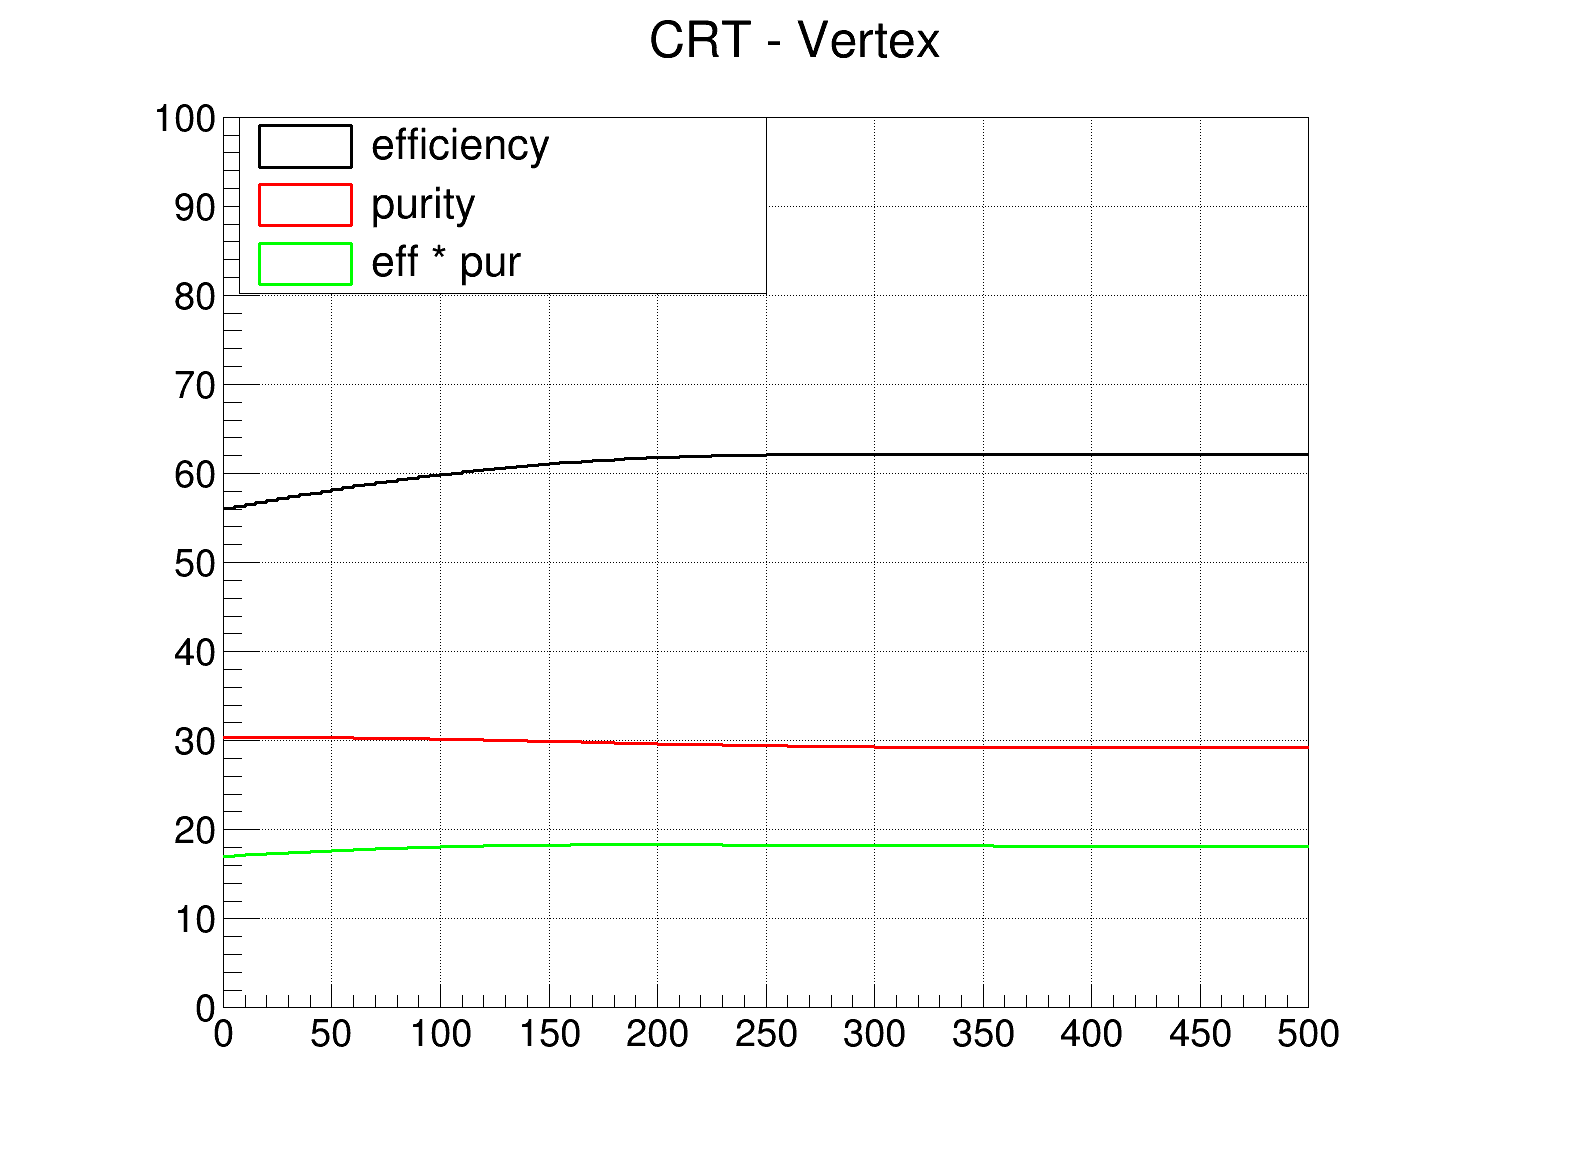

In [21]:
value = 'abs(crthit_y-Nu_Vy_sce)'
xbins = 100
xstart = 0
xend = 500.0
step = 500/xbins
title = 'CRT - Vertex'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)

for i in range(xbins): 
    cut = 'muon && fidVol && TrackLength>8 && (crthit_y==-9999 || (crthit_y<300 && crthit_y>-240 && '+value+'<('+str(step)+'*'+str(i)+')))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_pur.SetLineWidth(3)
h_eff.SetLineWidth(3)
h_effpur.SetLineWidth(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

In [13]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [16]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

Warning in <TROOT::Append>: Replacing existing TH1: h_pos_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_ext (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pos_dirt (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/png/h_pos_CRTZ_sample.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/root/h_pos_CRTZ_sample.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut/pdf/h_pos_CRTZ_sample.pdf has been created


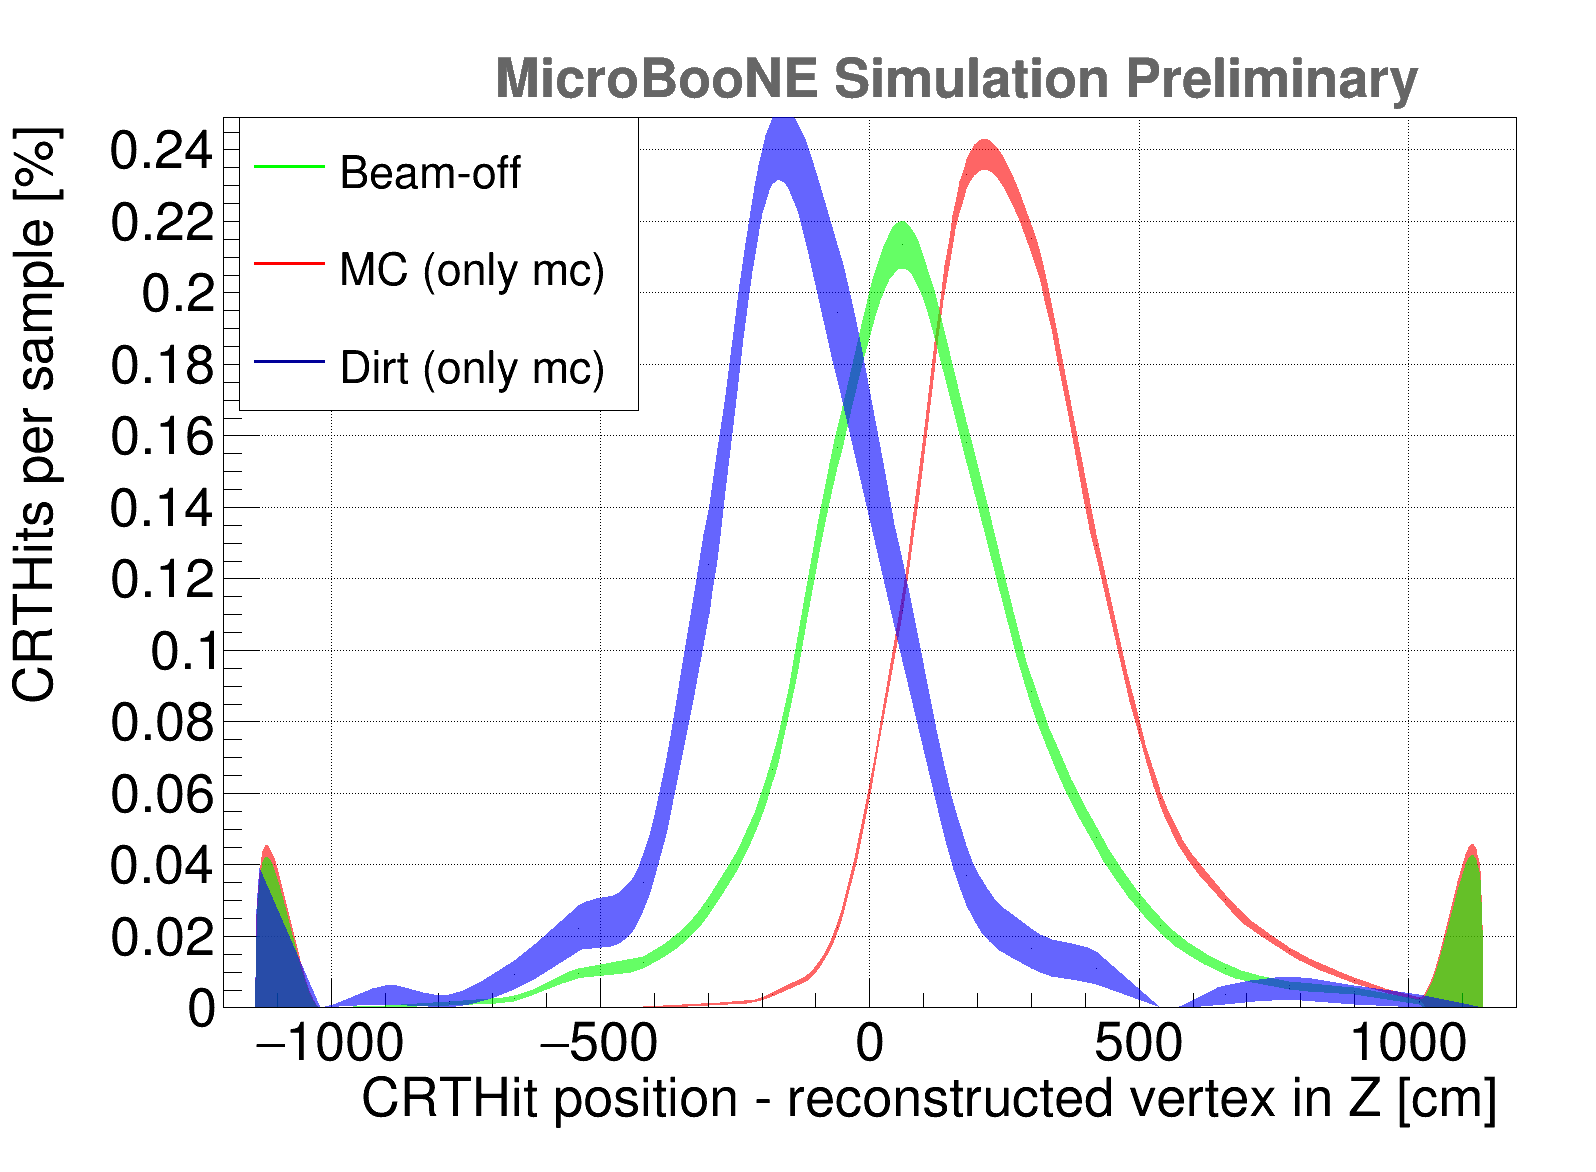

In [17]:
title = 'CRT Hit - reco Vertex position Z'

name = 'CRTZ_sample'
xstart = -1200
xend = 1200
xbin = 20
cut = 'fidVol && crt_adc>100 && track_end_uncontained &&'
variable = 'crthit_z-Nu_Vz_sce'
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(0)
h_pos_data = ROOT.TH1F("h_pos_data",title,xbin,xstart,xend)
h_pos_ext = ROOT.TH1F("h_pos_ext",title,xbin,xstart,xend)
h_pos_MC = ROOT.TH1F("h_pos_MC",title,xbin,xstart,xend)
h_pos_dirt = ROOT.TH1F("h_pos_dirt",title,xbin,xstart,xend)
data.Draw(variable+'>>h_pos_data',cut+'1')
ext.Draw(variable+'>>h_pos_ext',cut+'1')
overlay.Draw(variable+'>>h_pos_MC',cut+'adc_length==2 && numu_true')
dirt.Draw(variable+'>>h_pos_dirt',cut+'adc_length==2')
h_pos_MC.SetXTitle("CRTHit position - reconstructed vertex in Z [cm]")
h_pos_MC.SetYTitle("CRTHits per sample [%]")
legend = ROOT.TLegend(0.15,0.65,0.4,0.9) # LEGEND LEFT
#legend.AddEntry(h_pos_data,"data","l");
legend.AddEntry(h_pos_ext,"Beam-off","l");
legend.AddEntry(h_pos_MC,"MC (only mc)","l");
legend.AddEntry(h_pos_dirt,"Dirt (only mc)","l");
h_pos_data.SetLineColor(1)
h_pos_ext.SetLineColor(3)
h_pos_MC.SetLineColor(2)
h_pos_data.SetLineWidth(3)
h_pos_ext.SetLineWidth(3)
h_pos_MC.SetLineWidth(3)
h_pos_dirt.SetLineWidth(3)

h_pos_MC.GetYaxis().SetTitleSize(0.05)
h_pos_MC.GetYaxis().SetTitleOffset(0.0)
h_pos_MC.GetYaxis().SetLabelSize(0.05)

h_pos_MC.GetXaxis().SetTitleSize(0.05)
h_pos_MC.GetXaxis().SetLabelSize(0.05)
h_pos_MC.GetXaxis().SetTitleOffset(1)

#h_pos_ext.SetLineColor(ROOT.kGreen)
#h_pos_ext.SetLineWidth(4)
'''
h_pos_ext.SetXTitle("Plane with CRT hit in beam window")
h_pos_ext.SetYTitle("CRTHits per CRT plane [%]")
#ROOT.gStyle.SetEndErrorSize(5)

h_pos_ext.SetMinimum(0)
h_pos_ext.SetMaximum(100)
'''

h_pos_ext.SetFillColorAlpha(ROOT.kGreen,0.6)
h_pos_data.SetFillColorAlpha(ROOT.kBlack,0.6)
h_pos_MC.SetFillColorAlpha(ROOT.kRed,0.6)
h_pos_dirt.SetFillColorAlpha(ROOT.kBlue,0.6)

#h_pos_data.Scale(1.0, "width")
h_pos_data.Scale(100.0/h_pos_data.Integral(), "width")
h_pos_ext.Scale(100.0/h_pos_ext.Integral(), "width")
h_pos_MC.Scale(100.0/h_pos_MC.Integral(), "width")
h_pos_dirt.Scale(100.0/h_pos_dirt.Integral(), "width");
h_pos_MC.Draw('E4')
#h_pos_data.Draw('same')
h_pos_ext.Draw('same E4')
h_pos_dirt.Draw('same E4')
legend.Draw('same');
c1.SetRightMargin(0.05)
prelim = draw_sim()
prelim.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "h_pos_"+name+".png")
c1.SaveAs(outputdir_root + "h_pos_"+name+".root")
c1.SaveAs(outputdir_pdf + "h_pos_"+name+".pdf")

Variation of cut on: (crthit_z - Nu_Vz_sce)
Maximum value:  0.0
Bin:  1  -> Value:  -500.0


Warning in <TROOT::Append>: Replacing existing TH1: h_eff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_effpur (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/(crthit_z - Nu_Vz_sce)trklen.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/(crthit_z - Nu_Vz_sce)trklen.root has been created


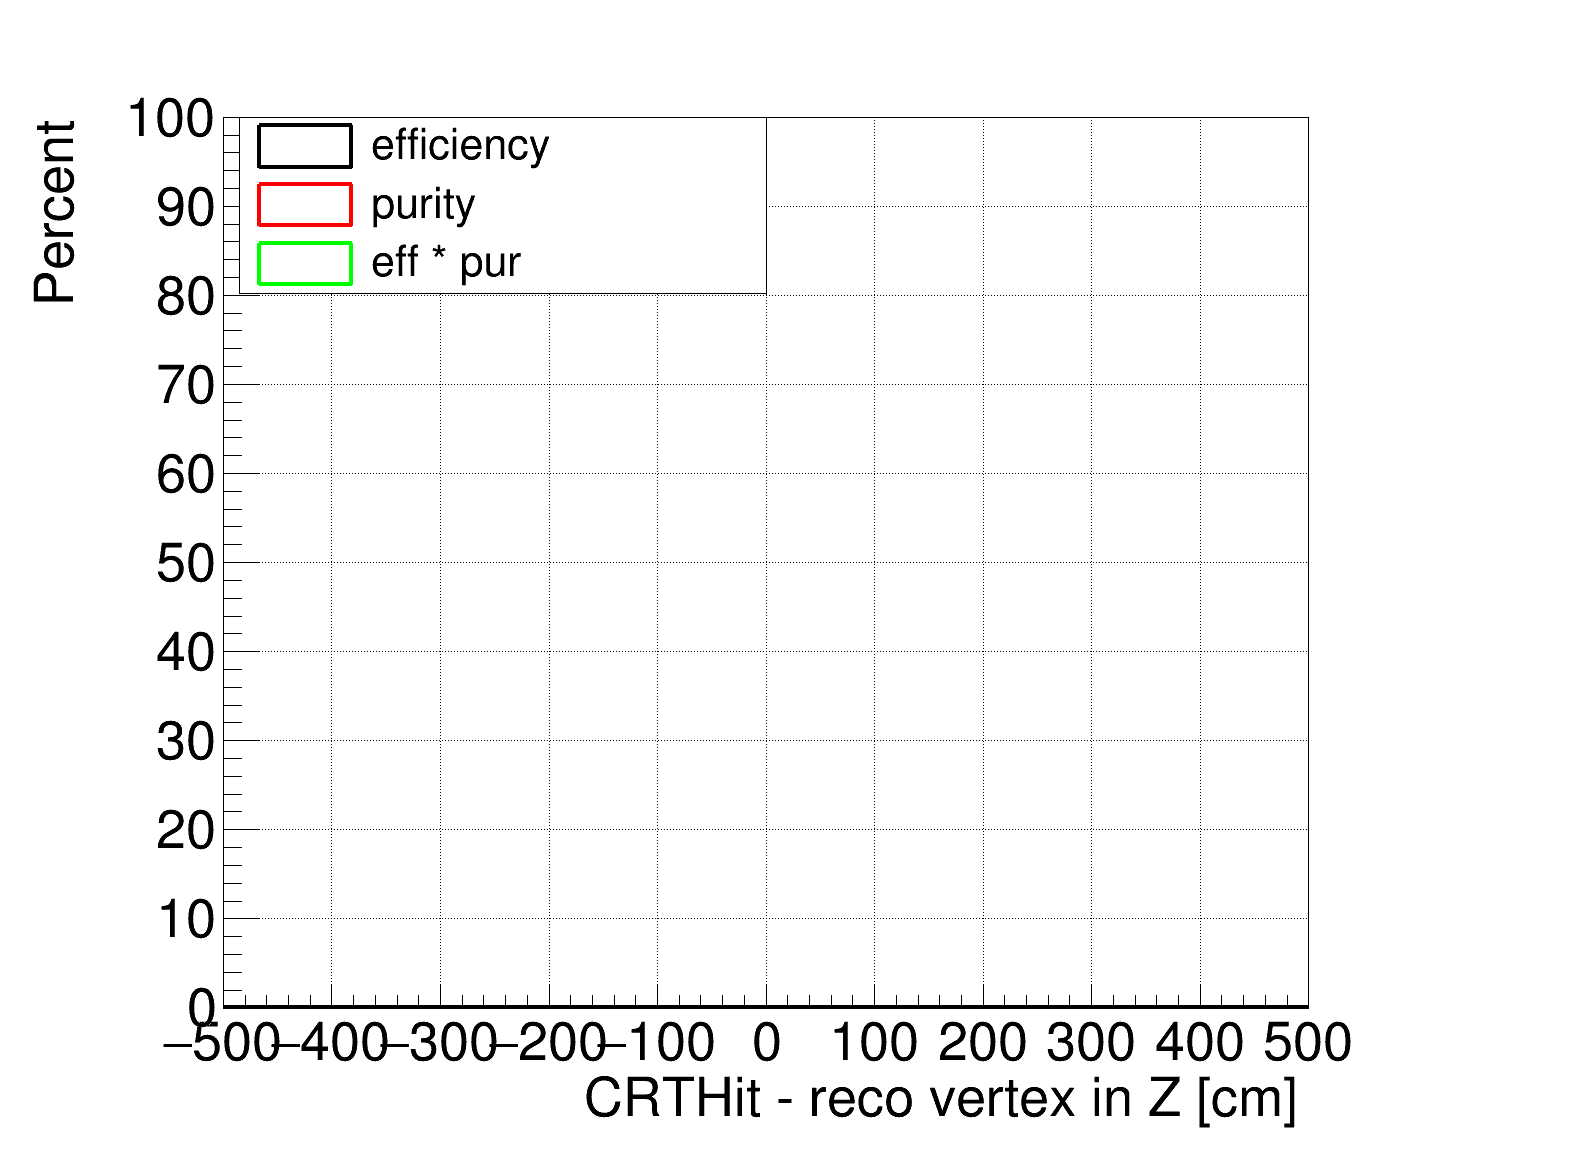

In [55]:
value = '(crthit_z - Nu_Vz_sce)'
xbins = 100
xstart = -500.0
xend = 500.0
step = (xend - xstart)/xbins
title = 'CRT - Vertex'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)

for i in range(xbins): 
    cut = 'muon && fidVol && TrackLength>8 && ( crthit_z==9999 || '+value+'>('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetLineWidth(4)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_pur.SetLineWidth(4)
h_effpur.SetLineColor(3)
h_effpur.SetLineWidth(4)

h_eff.GetYaxis().SetTitleSize(0.05)
h_eff.GetYaxis().SetTitleOffset(0.0)
h_eff.GetYaxis().SetLabelSize(0.05)

h_eff.GetXaxis().SetTitleSize(0.05)
h_eff.GetXaxis().SetLabelSize(0.05)
h_eff.GetXaxis().SetTitleOffset(1)

h_eff.SetYTitle("Percent")
h_eff.SetXTitle("CRTHit - reco vertex in Z [cm]")

h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +"trklen.png");
c1.SaveAs(outputdir_root+ value+ "trklen.root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

Variation of cut on: (crthit_z - Nu_Vz_sce)
Maximum value:  0.0
Bin:  1  -> Value:  -500.0


Warning in <TROOT::Append>: Replacing existing TH1: h_eff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_effpur (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/(crthit_z - Nu_Vz_sce)crtcont.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/(crthit_z - Nu_Vz_sce)crtcont.root has been created


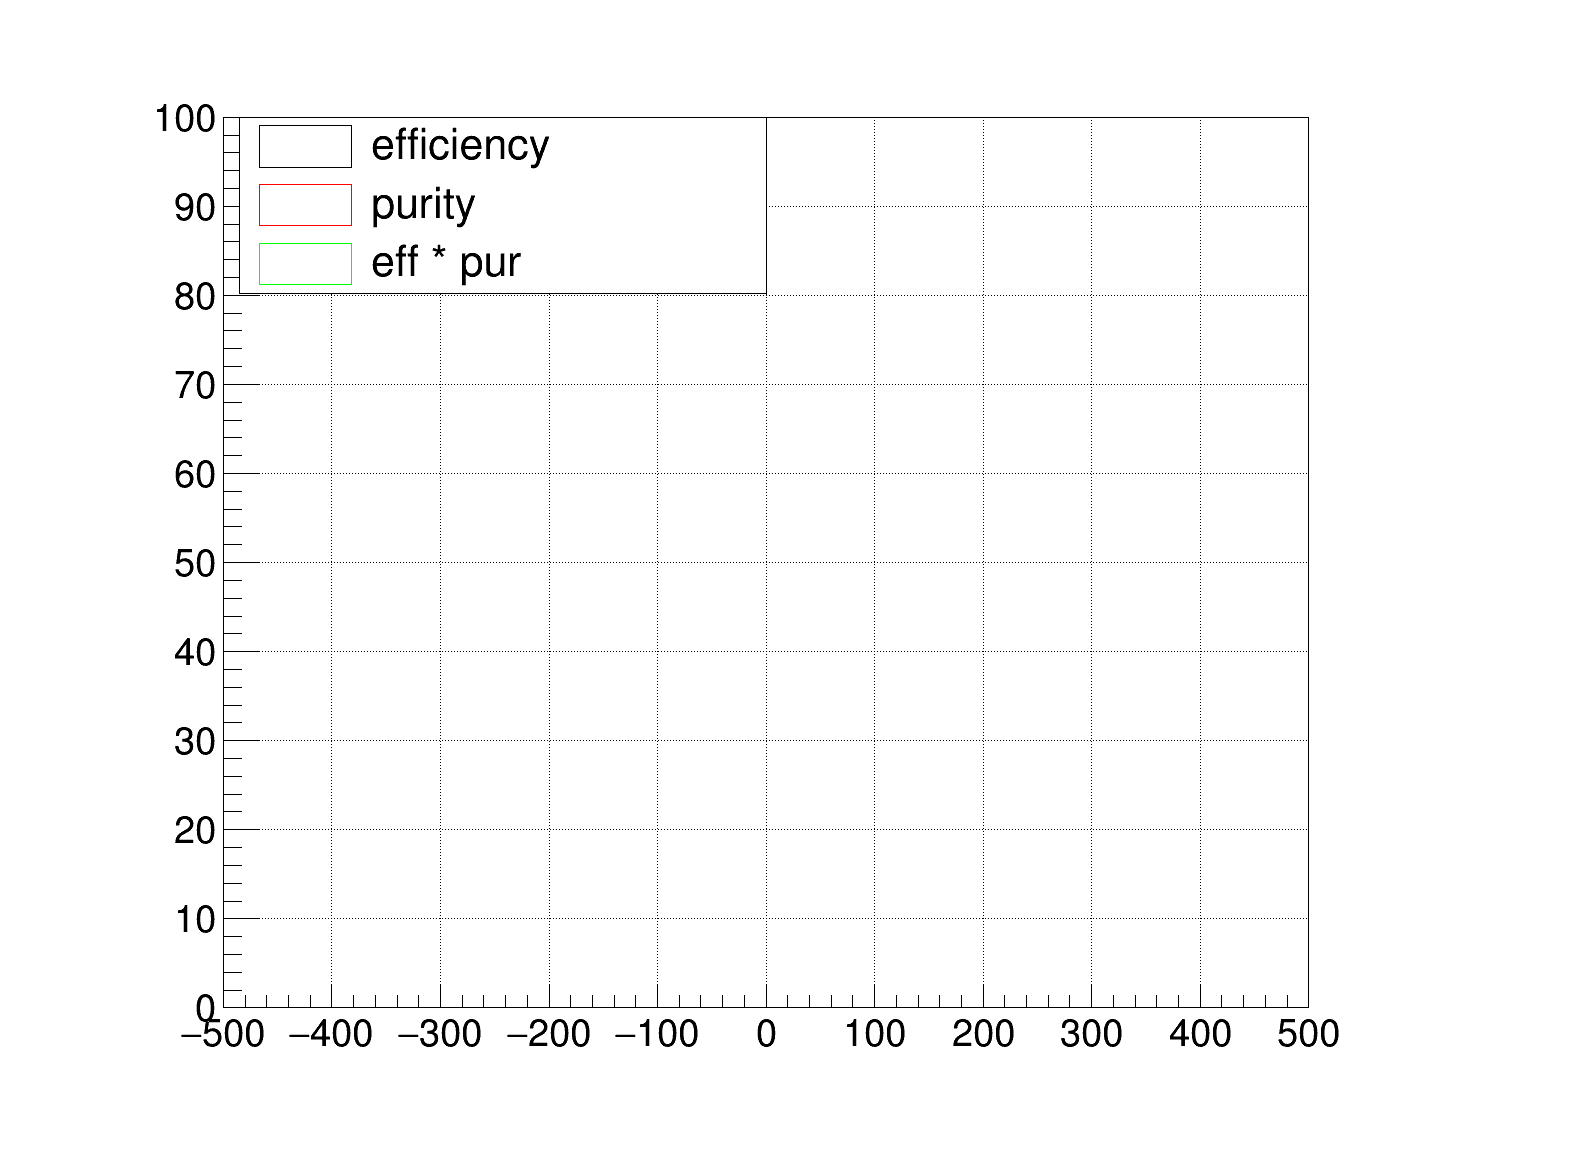

In [56]:
value = '(crthit_z - Nu_Vz_sce)'
xbins = 5
xstart = -500.0
xend = 500.0
step = (xend - xstart)/xbins
title = 'CRT - Vertex'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)

for i in range(xbins): 
    cut = 'muon && fidVol && TrackLength>8 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && ( crthit_z==9999 || '+value+'>('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +"crtcont.png");
c1.SaveAs(outputdir_root+ value+ "crtcont.root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

Variation of cut on: (crthit_z - Nu_Vz_sce)
Maximum value:  18.4945449829
Bin:  6  -> Value:  0.0


Warning in <TROOT::Append>: Replacing existing TH1: h_eff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_effpur (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/(crthit_z - Nu_Vz_sce)crttop.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/(crthit_z - Nu_Vz_sce)crttop.root has been created


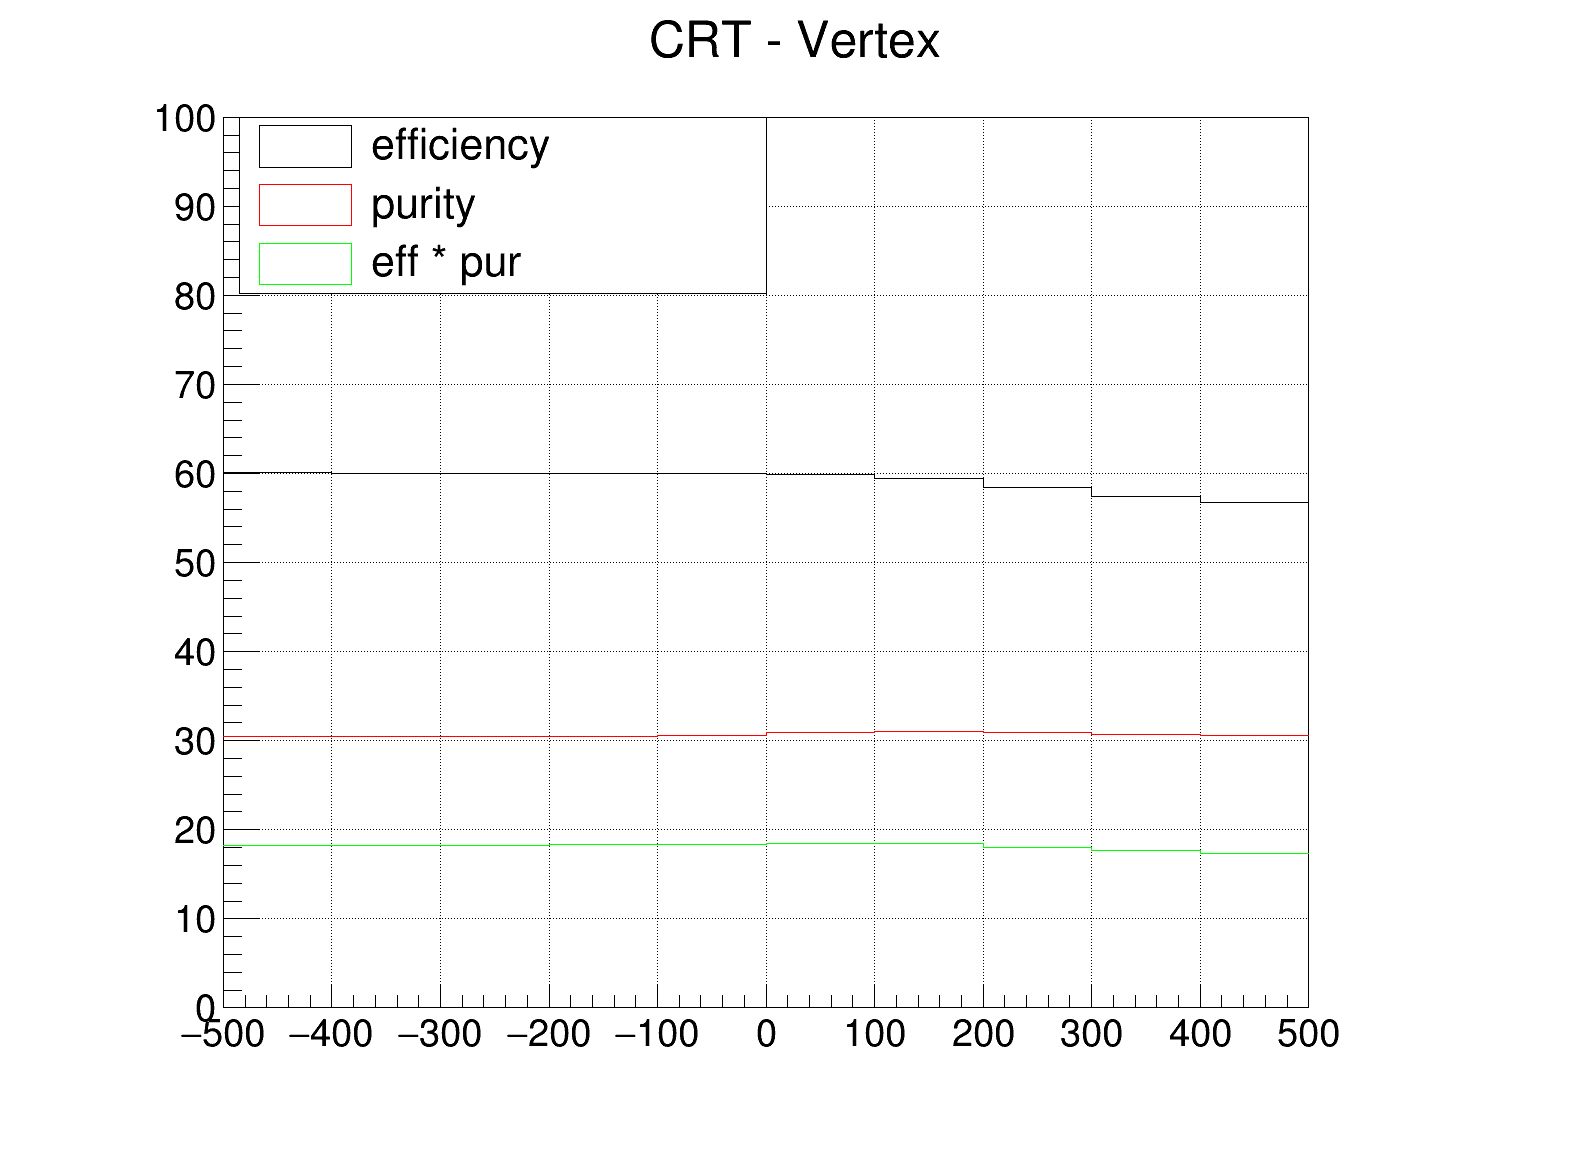

In [37]:
value = '(crthit_z - Nu_Vz_sce)'
xbins = 10
xstart = -500.0
xend = 500.0
step = (xend - xstart)/xbins
title = 'CRT - Vertex'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)

for i in range(xbins): 
    cut = 'muon && fidVol && TrackLength>8 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && nr_crthit_top==0 && ( crthit_z==9999 || '+value+'>('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +"crttop.png");
c1.SaveAs(outputdir_root+ value+ "crttop.root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

Variation of cut on: (crthit_z - Nu_Vz_sce)
Maximum value:  19.1471443176
Bin:  6  -> Value:  0.0


Warning in <TROOT::Append>: Replacing existing TH1: h_eff (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_pur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_effpur (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/(crthit_z - Nu_Vz_sce)crtcut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/(crthit_z - Nu_Vz_sce)crtcut.root has been created


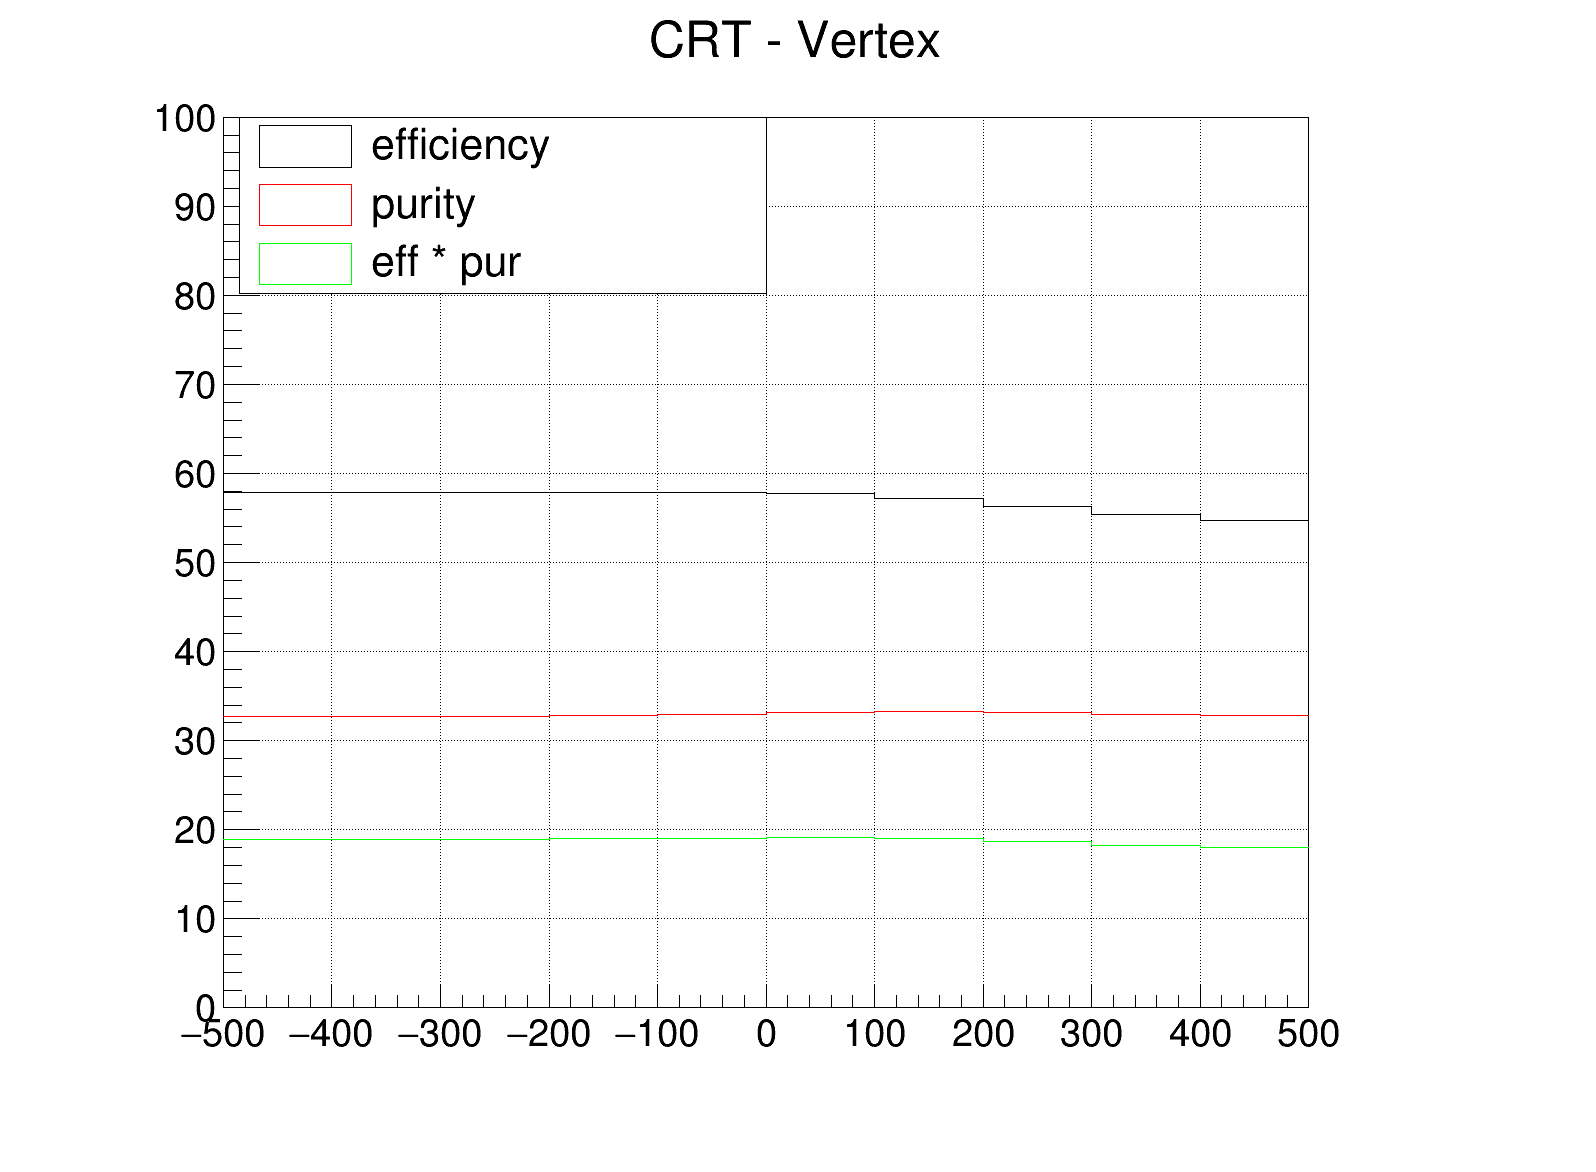

In [38]:
value = '(crthit_z - Nu_Vz_sce)'
xbins = 10
xstart = -500.0
xend = 500.0
step = (xend - xstart)/xbins
title = 'CRT - Vertex'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)

for i in range(xbins): 
    cut = 'muon && fidVol && TrackLength>8 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && nr_crthit_top==0 && crt_cut && ( crthit_z==9999 || '+value+'>('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +"crtcut.png");
c1.SaveAs(outputdir_root+ value+ "crtcut.root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

In [27]:
NuCC.printEff('fidVol && muon')

Rejection on each sample:


ZeroDivisionError: float division by zero

In [27]:
NuCC.printEff_out('fidVol && muon && TrackLength>8')

Rejection on each sample:
Keep of     ext:	99.85%	 reject:	0.15%
Keep of overlay:	99.90%	 reject:	0.10%
Keep of    dirt:	99.75%	 reject:	0.25%

Efficiency:		64.81%
Purity:			25.55%
Purity*Efficiency	16.56

Amount of     ext:	39.07%
Amount of overlay:	56.76%
Amount of    dirt:	4.17%

Signal definition=  numu_lowpur: 2.61%	(5.98%)
Signal definition=   numu_other: 0.37%	(0.84%)
Signal definition=    numu_nomu: 3.38%	(7.75%)
Signal definition=      numu_ov: 6.38%	(14.61%)
Signal definition=  numu_signal: 25.55%	(58.53%)
Signal definition=      numu_nc: 5.36%	(12.29%)


In [18]:
NuCC.printEff_out('fidVol && muon && TrackLength>8 && (track_end_uncontained==1 || nr_crthit_beam_tres==0)')

Rejection on each sample:
Keep of     ext:	69.44%	 reject:	30.56%
Keep of overlay:	91.87%	 reject:	8.13%
Keep of    dirt:	77.82%	 reject:	22.18%

Efficiency:		60.88%
Purity:			29.05%
Purity*Efficiency	17.69

Amount of     ext:	32.89%
Amount of overlay:	63.18%
Amount of    dirt:	3.94%

Signal definition=  numu_lowpur: 2.79%	(5.75%)
Signal definition=   numu_other: 0.42%	(0.86%)
Signal definition=    numu_nomu: 3.46%	(7.11%)
Signal definition=      numu_ov: 6.58%	(13.54%)
Signal definition=  numu_signal: 29.05%	(59.78%)
Signal definition=      numu_nc: 6.30%	(12.95%)


In [19]:
NuCC.printEff_out('fidVol && muon && TrackLength>8 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && nr_crthit_top==0')

Rejection on each sample:
Keep of     ext:	58.79%	 reject:	41.21%
Keep of overlay:	90.90%	 reject:	9.10%
Keep of    dirt:	76.29%	 reject:	23.71%

Efficiency:		60.08%
Purity:			30.43%
Purity*Efficiency	18.28

Amount of     ext:	29.55%
Amount of overlay:	66.35%
Amount of    dirt:	4.10%

Signal definition=  numu_lowpur: 2.94%	(5.76%)
Signal definition=   numu_other: 0.44%	(0.87%)
Signal definition=    numu_nomu: 3.65%	(7.16%)
Signal definition=      numu_ov: 6.90%	(13.52%)
Signal definition=  numu_signal: 30.43%	(59.63%)
Signal definition=      numu_nc: 6.67%	(13.07%)


In [20]:
NuCC.printEff_out('fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0)')

Rejection on each sample:
Keep of     ext:	56.47%	 reject:	43.53%
Keep of overlay:	90.50%	 reject:	9.50%
Keep of    dirt:	70.17%	 reject:	29.83%

Efficiency:		59.88%
Purity:			30.88%
Purity*Efficiency	18.49

Amount of     ext:	28.90%
Amount of overlay:	67.26%
Amount of    dirt:	3.84%

Signal definition=  numu_lowpur: 2.98%	(5.76%)
Signal definition=   numu_other: 0.45%	(0.87%)
Signal definition=    numu_nomu: 3.72%	(7.18%)
Signal definition=      numu_ov: 6.92%	(13.37%)
Signal definition=  numu_signal: 30.88%	(59.69%)
Signal definition=      numu_nc: 6.79%	(13.12%)


In [21]:
NuCC.printEff_out('fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut')

Rejection on each sample:
Keep of     ext:	46.21%	 reject:	53.79%
Keep of overlay:	84.48%	 reject:	15.52%
Keep of    dirt:	59.60%	 reject:	40.40%

Efficiency:		57.71%
Purity:			33.18%
Purity*Efficiency	19.15

Amount of     ext:	26.37%
Amount of overlay:	70.00%
Amount of    dirt:	3.63%

Signal definition=  numu_lowpur: 2.69%	(5.00%)
Signal definition=   numu_other: 0.47%	(0.88%)
Signal definition=    numu_nomu: 4.02%	(7.46%)
Signal definition=      numu_ov: 6.44%	(11.96%)
Signal definition=  numu_signal: 33.18%	(61.62%)
Signal definition=      numu_nc: 7.04%	(13.07%)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/TrackLength_stag.png.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/TrackLength_stag.png.root has been created


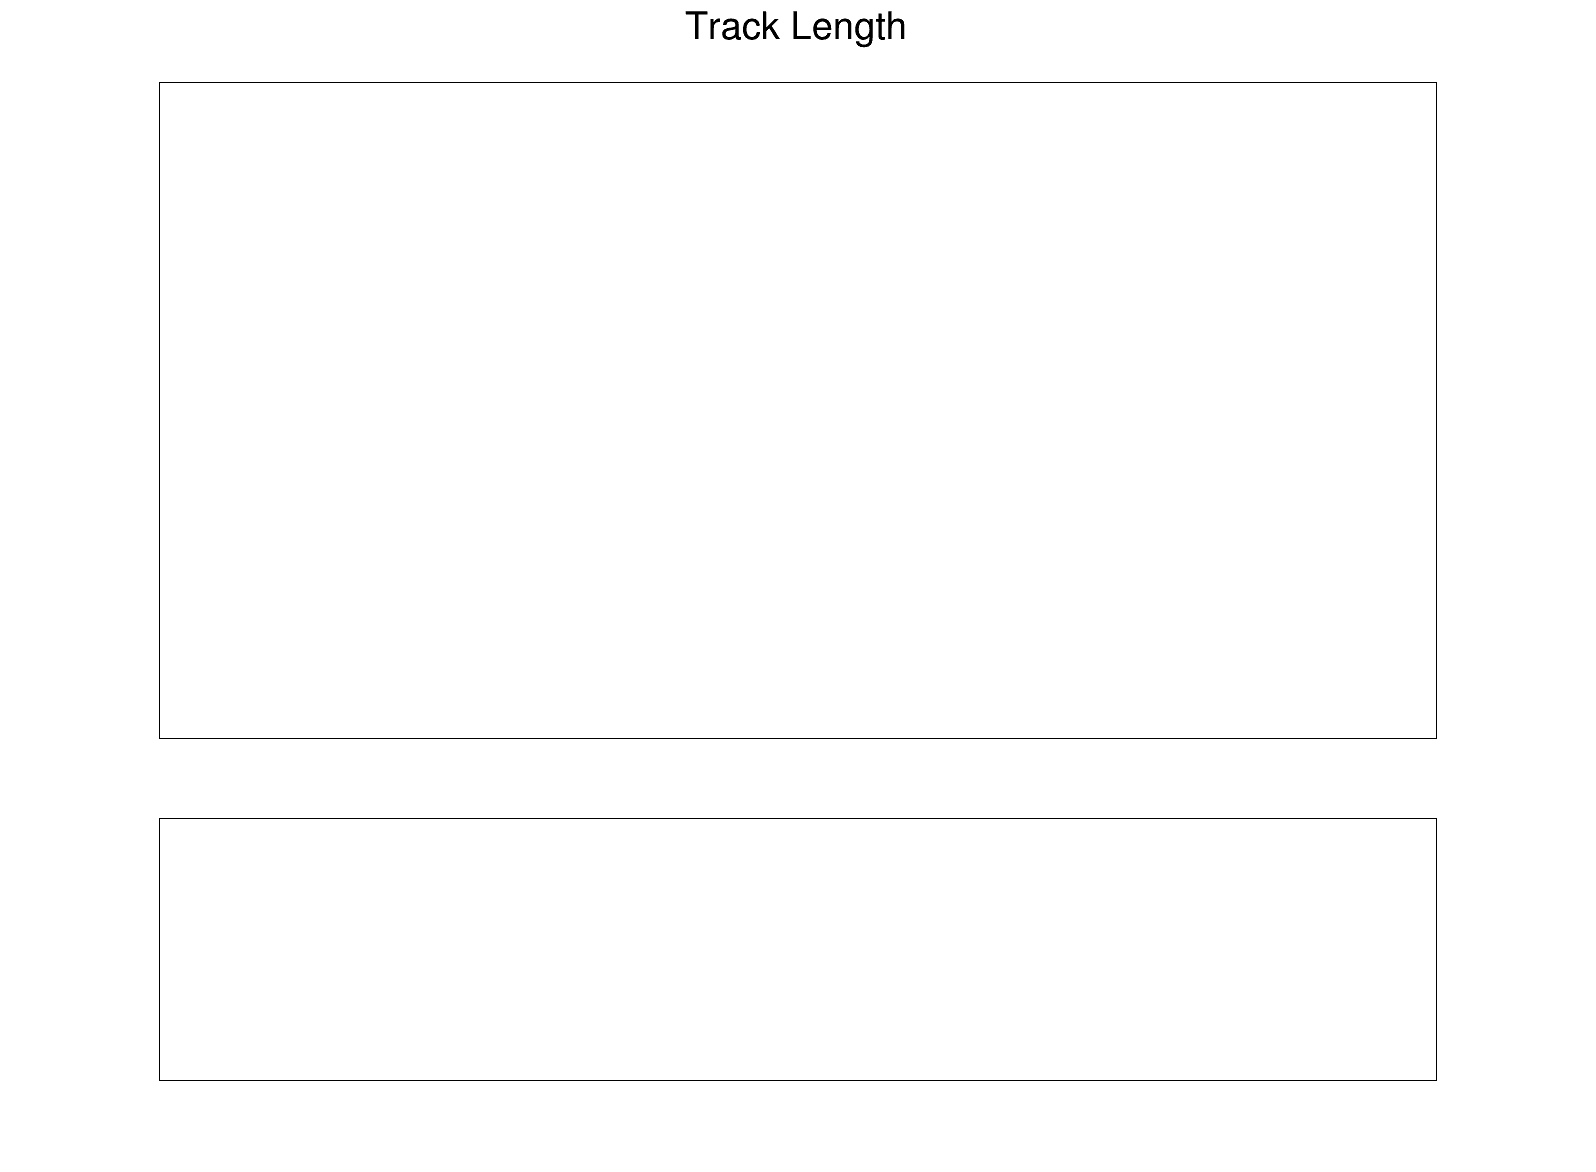

In [32]:
cut = 'key_muprotratio==track_key && fidVol'
NuCC.make_stacked_histo_plot_out(cut,'TrackLength','Track Length',0,500,50,'TrackLength_stag.png')

In [33]:
NuCC.printEff_out('fidVol && muon && TrackLength>8 && nr_crthit_beam_tres==0')

Rejection on each sample:
Keep of     ext:	53.54%	 reject:	46.46%
Keep of overlay:	86.36%	 reject:	13.64%
Keep of    dirt:	68.74%	 reject:	31.26%

Efficiency:		56.12%
Purity:			30.36%
Purity*Efficiency	17.04

Amount of     ext:	28.74%
Amount of overlay:	67.31%
Amount of    dirt:	3.94%

Signal definition=  numu_lowpur: 3.05%	(5.89%)
Signal definition=   numu_other: 0.46%	(0.88%)
Signal definition=    numu_nomu: 3.84%	(7.42%)
Signal definition=      numu_ov: 6.96%	(13.45%)
Signal definition=  numu_signal: 30.36%	(58.63%)
Signal definition=      numu_nc: 7.10%	(13.72%)


In [22]:
NuCC.printEff_out('fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut')

Rejection on each sample:
Keep of     ext:	46.21%	 reject:	53.79%
Keep of overlay:	84.48%	 reject:	15.52%
Keep of    dirt:	59.60%	 reject:	40.40%

Efficiency:		57.71%
Purity:			33.18%
Purity*Efficiency	19.15

Amount of     ext:	26.37%
Amount of overlay:	70.00%
Amount of    dirt:	3.63%

Signal definition=  numu_lowpur: 2.69%	(5.00%)
Signal definition=   numu_other: 0.47%	(0.88%)
Signal definition=    numu_nomu: 4.02%	(7.46%)
Signal definition=      numu_ov: 6.44%	(11.96%)
Signal definition=  numu_signal: 33.18%	(61.62%)
Signal definition=      numu_nc: 7.04%	(13.07%)


In [35]:
NuCC.printEff_out('fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25)')


Rejection on each sample:
Keep of     ext:	0.00%	 reject:	100.00%
Keep of overlay:	0.00%	 reject:	100.00%
Keep of    dirt:	0.00%	 reject:	100.00%

Efficiency:		0.00%


ZeroDivisionError: float division by zero

In [ ]:
NuCC.printEff_out('fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut')


In [53]:
nenner_cut = "numu_true"
zahler_cut = "numu_signal && fidVol && muon"
cut =  "fidVol && muon"
name = '_ini'
title = 'Initial:'


NuCC.plot_eff_outV2(nenner_cut, zahler_cut, cut, name, title)

Efficiency:	64.81%
Purity:		25.52%


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_energy_ini.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_energy_ini.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_theta_ini.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_theta_ini.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_phi_ini.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_phi_ini.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub

In [37]:
nenner_cut = "numu_true"
zahler_cut = "numu_signal && fidVol && muon && TrackLength>8"
cut =  "fidVol && muon && TrackLength>8"
name = '_tracklen'
title = 'After track length cut only:'

NuCC.plot_eff_outV2(nenner_cut, zahler_cut, cut, name, title)

Efficiency:	64.81%
Purity:		25.55%


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_energy_tracklen.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_energy_tracklen.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_theta_tracklen.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_theta_tracklen.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_phi_tracklen.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h

In [23]:
nenner_cut = "numu_true"
zahler_cut = "numu_signal && fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut"
cut =  "fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut"
name = '_CRTtom'
title = 'After toms CRT cut:'

NuCC.plot_eff_outV2(nenner_cut, zahler_cut, cut, name, title)

Efficiency:	57.71%
Purity:		33.18%


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_energy_CRTtom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_energy_CRTtom.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_theta_CRTtom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_theta_CRTtom.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_phi_CRTtom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_phi_C

In [24]:
nenner_cut = "numu_signal"
zahler_cut = "numu_signal && fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut"
cut =  "fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut"
name = '_CRTtomOnly'
title = 'After toms CRT cut:'

NuCC.plot_eff_outV2(nenner_cut, zahler_cut, cut, name, title)

Efficiency:	57.71%
Purity:		33.18%


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_energy_CRTtomOnly.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_energy_CRTtomOnly.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_theta_CRTtomOnly.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_theta_CRTtomOnly.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_phi_CRTtomOnly.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_phi_CRTtomOnly.root has been created
Info in <TCanvas::

In [40]:
nenner_cut = "numu_true"
zahler_cut = "numu_signal && fidVol && muon && TrackLength>8 && nr_crthit_beam_tres==0"
cut =  "fidVol && muon && TrackLength>8 && nr_crthit_beam_tres==0"
name = '_CRTveto'
title = 'After total CRT veto:'

NuCC.plot_eff_outV2(nenner_cut, zahler_cut, cut, name, title)

Efficiency:	56.12%
Purity:		30.36%


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_energy_CRTveto.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_energy_CRTveto.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_theta_CRTveto.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_theta_CRTveto.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/h_eff_phi_CRTveto.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/h_eff_phi_CRTveto.root has been created
Info in <TCanvas::Print>: png file /

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/NuVx_sce_CRTcut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//root/NuVx_sce_CRTcut.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_ext_func (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_dirt_func (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_lowpur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_other (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_nomu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_ov (Potential memory leak).
Warning in <TROOT:

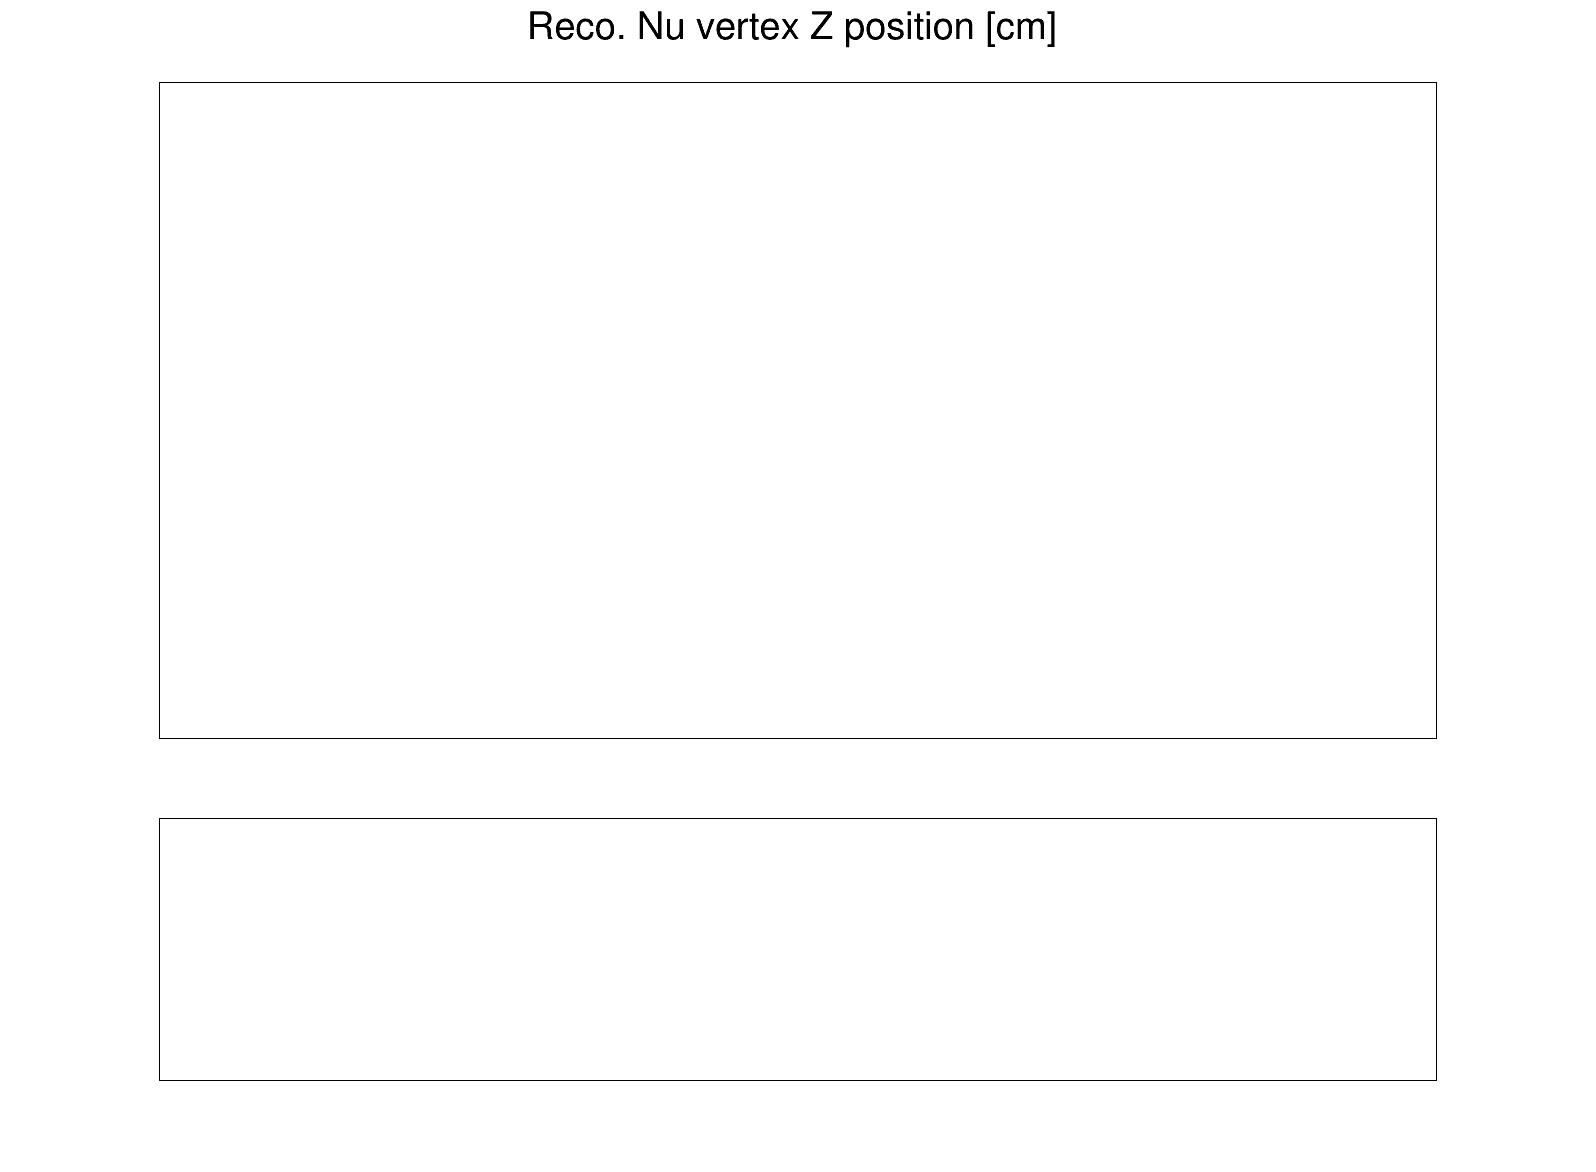

In [25]:
# Generate stacked histograms with crt cut and tracklength cut
cut = 'fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'
name = '_CRTcut'

NuCC.make_stacked_histo_plot_out(cut,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',0,250,25,'NuVx_sce'+name)
NuCC.make_stacked_histo_plot_out(cut,'Nu_Vy_sce','Reconstructed neutrino vertex Y position [cm]',-110,115,22,'NuVy_sce'+name)
NuCC.make_stacked_histo_plot_out(cut,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-20,1020,100,'NuVz_sce'+name)

"\nNuCC.make_stacked_histo_plot_out(cut,'TrackMomMCS_mom','Track momentum [GeV]',0,3,20,'MCSMom'+name)\nNuCC.make_stacked_histo_plot_out(cut,'TrackLength','Track length [cm]',0,500,20,'tracklength'+name)\nNuCC.make_stacked_histo_plot_out(cut + ' && TrackTheta!=-9','cos(TrackTheta)','cos(theta)',-1,1,20,'costheta'+name)\nNuCC.make_stacked_histo_plot_out(cut + ' && TrackTheta!=-9','TrackPhi','Phi on muoncandidate',-3.1416,3.1416,20,'trackphi'+name)\nNuCC.make_stacked_histo_plot_out(cut,'NuScore','Total NuScore of event',0,1,20,'NuScore'+name)\nNuCC.make_stacked_histo_plot_out(cut,'NuTracks','Number of tracks',0,8,8,'num_track'+name)\n\nNuCC.make_stacked_histo_plot_out(cut,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',0,250,25,'NuVx_sce'+name)\nNuCC.make_stacked_histo_plot_out(cut,'Nu_Vy_sce','Reconstructed neutrino vertex Y position [cm]',-110,115,22,'NuVy_sce'+name)\nNuCC.make_stacked_histo_plot_out(cut,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-20,1020,100,'NuVz_sce'+name)\n"

Warning in <TROOT::Append>: Replacing existing TH1: h_ext_func (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_dirt_func (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_lowpur (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_other (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_nomu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_ov (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_signal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: numu_nc (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_17/NumuCC_crtcut//png/FlashTime_corr_CRTcut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/m

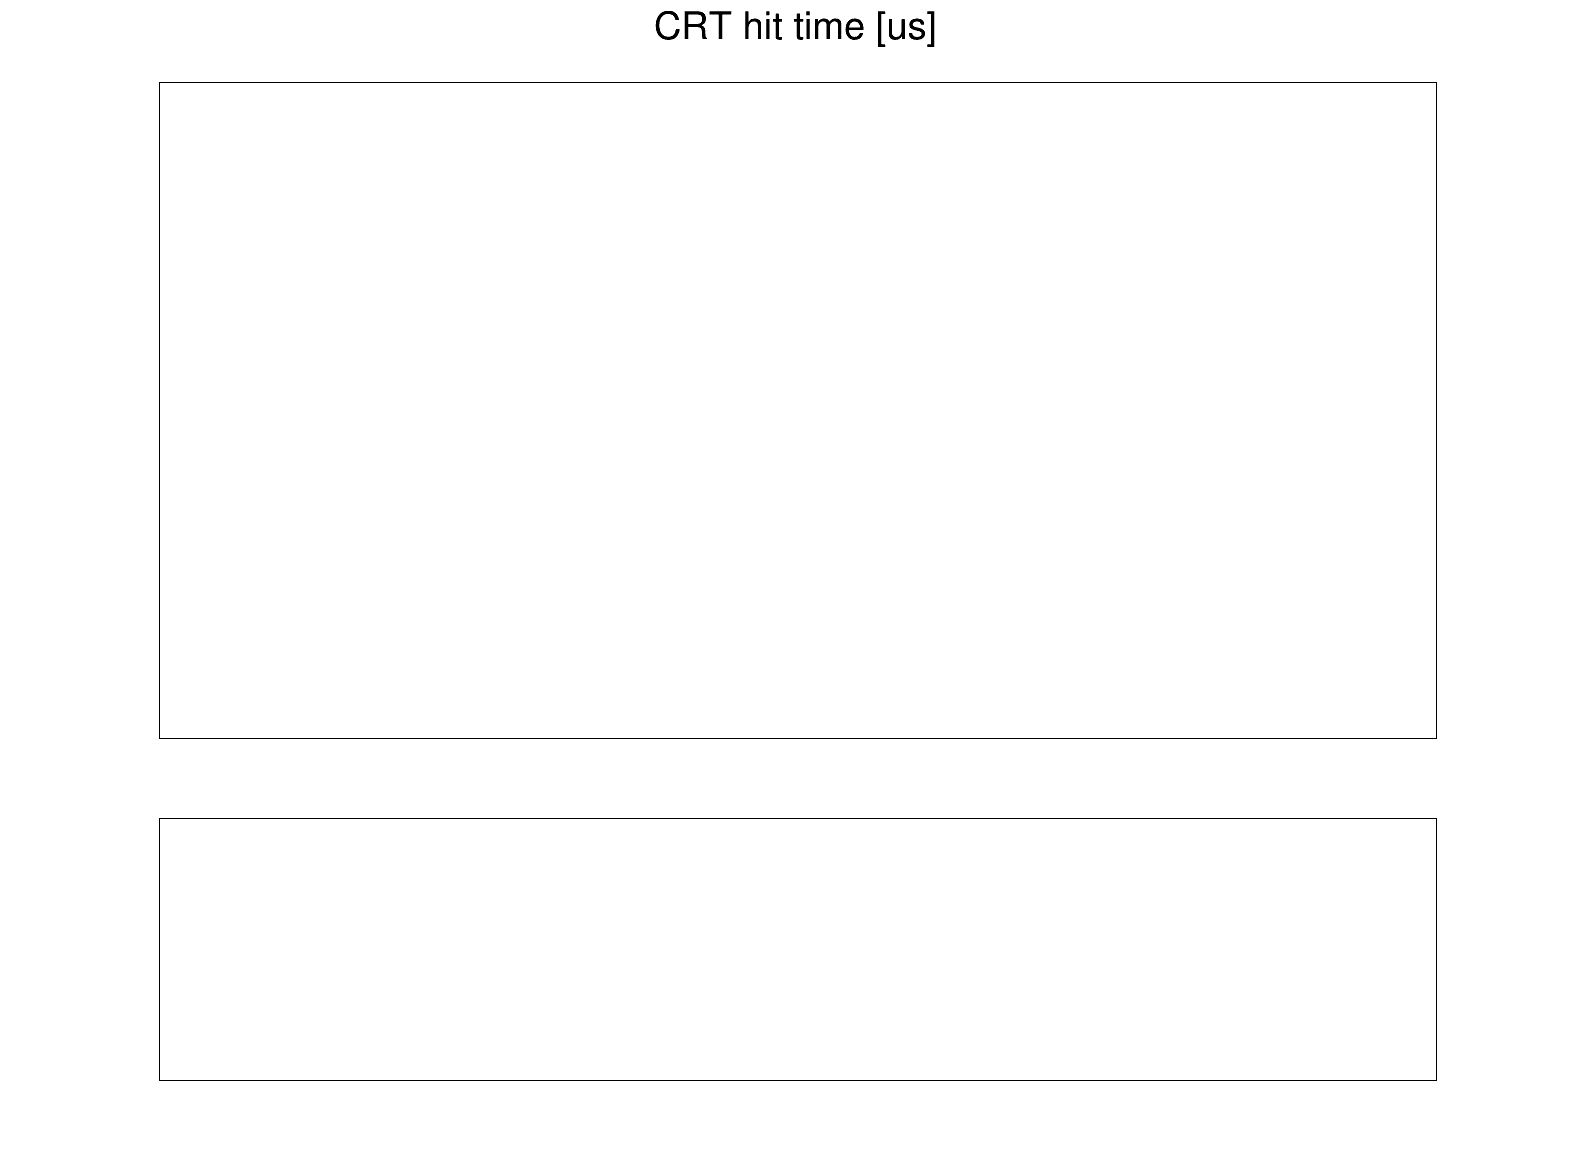

In [26]:
# Generate stacked histograms with crt cut and tracklength cut
cut = 'fidVol && muon && TrackLength>8 && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'
name = '_CRTcut'

NuCC.make_stacked_histo_plot_flashcorr_out(cut,'TimFla','Flash_time [us]',2.3,5.9,20,'FlashTime_corr'+name)
NuCC.make_stacked_histo_plot_crtcorr_out(cut,'crthit_ts0','CRT hit time [us]',2.3,5.9,20,'CRTTime_corr'+name)
'''
NuCC.make_stacked_histo_plot_out(cut,'TrackMomMCS_mom','Track momentum [GeV]',0,3,20,'MCSMom'+name)
NuCC.make_stacked_histo_plot_out(cut,'TrackLength','Track length [cm]',0,500,20,'tracklength'+name)
NuCC.make_stacked_histo_plot_out(cut + ' && TrackTheta!=-9','cos(TrackTheta)','cos(theta)',-1,1,20,'costheta'+name)
NuCC.make_stacked_histo_plot_out(cut + ' && TrackTheta!=-9','TrackPhi','Phi on muoncandidate',-3.1416,3.1416,20,'trackphi'+name)
NuCC.make_stacked_histo_plot_out(cut,'NuScore','Total NuScore of event',0,1,20,'NuScore'+name)
NuCC.make_stacked_histo_plot_out(cut,'NuTracks','Number of tracks',0,8,8,'num_track'+name)

NuCC.make_stacked_histo_plot_out(cut,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',0,250,25,'NuVx_sce'+name)
NuCC.make_stacked_histo_plot_out(cut,'Nu_Vy_sce','Reconstructed neutrino vertex Y position [cm]',-110,115,22,'NuVy_sce'+name)
NuCC.make_stacked_histo_plot_out(cut,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-20,1020,100,'NuVz_sce'+name)
'''

In [29]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [30]:
crt_tom_cut = ' nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'
data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

True

Events in the file: 302777  with number of Piont: 8156.0


Warning in <TROOT::Append>: Replacing existing TH1: h_2d_Pnt (Potential memory leak).


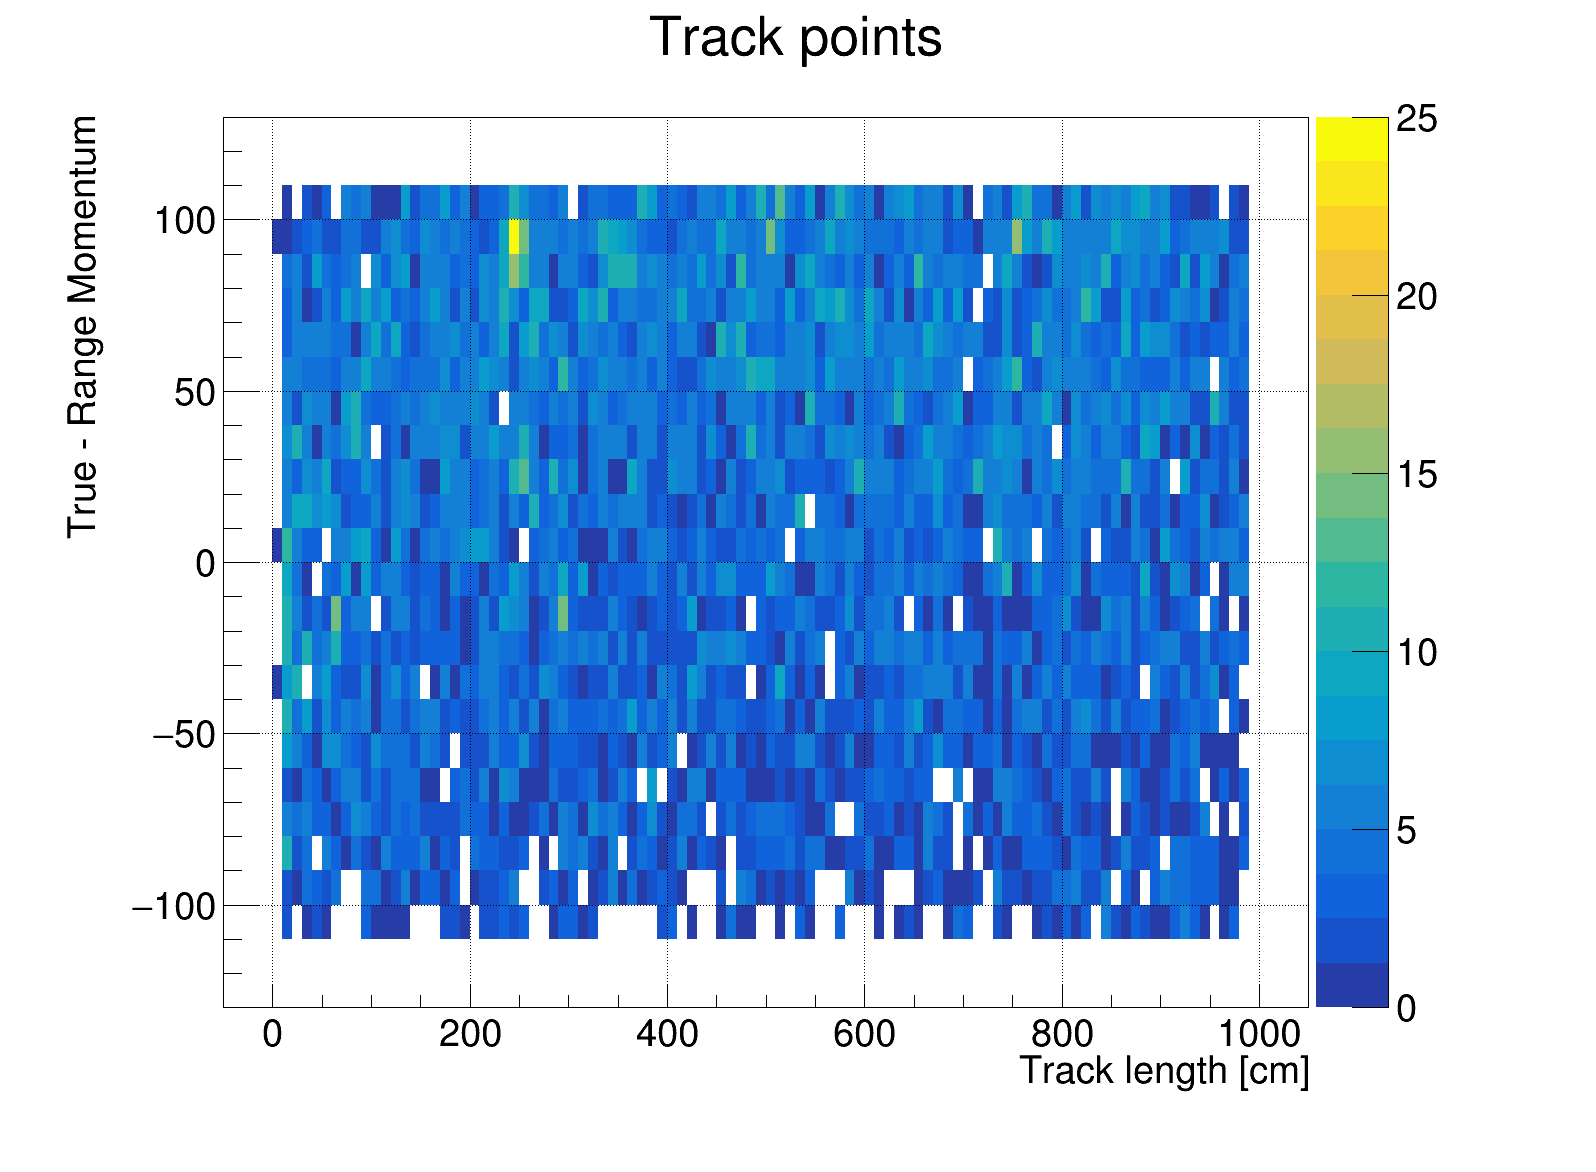

In [31]:
title = 'Track points'
xbin = 110
xstart = -50
xend = 1050
ybin = 26
ystart = -130
yend = 130
event_nr = 7
data_set = ext_out
cut = 'fidVol && TrackLength>8 && crt_tom_cut && muon'
#cut = '1'
h_2d_Pnt = ROOT.TH2F("h_2d_Pnt", title, xbin,xstart,xend,ybin,ystart,yend)
h_2d_Pnt.SetXTitle("Track length [cm]")
h_2d_Pnt.SetYTitle("True - Range Momentum")
data_set.Draw('Nu_Vy_sce:Nu_Vz_sce>>h_2d_Pnt',cut,'')
h_2d_Pnt.Draw('colz')
c1.SetLogy(0)
c1.Draw()
print 'Events in the file:', data_set.GetEntries(),' with number of Piont:', h_2d_Pnt.GetEntries()
#c1.SaveAs(outputdir_png + "h_range_contained_tracklength.png")
#c1.SaveAs(outputdir_root + "h_range_contained_tracklength.root")


Events in the file: 967267  with number of Piont: 226294.0


Warning in <TROOT::Append>: Replacing existing TH1: h_2d_Pnt (Potential memory leak).


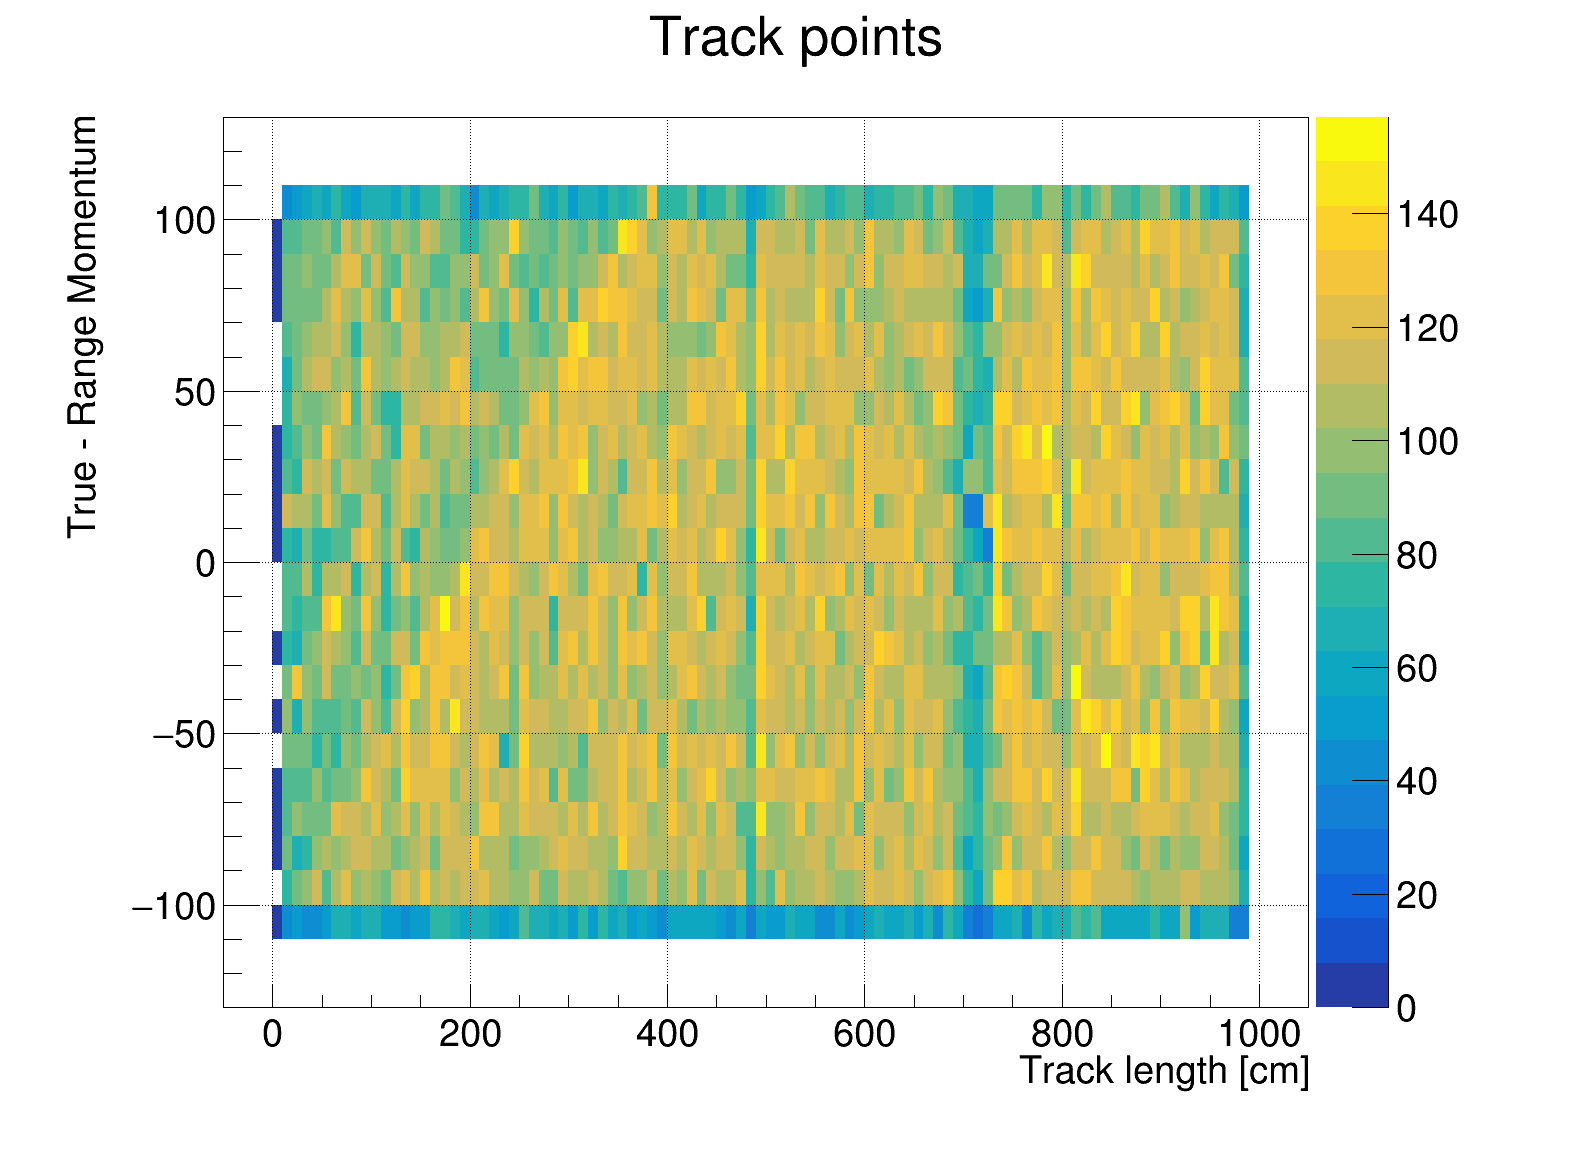

In [32]:
title = 'Track points'
xbin = 110
xstart = -50
xend = 1050
ybin = 26
ystart = -130
yend = 130
event_nr = 7
data_set = overlay_out
cut = 'fidVol && TrackLength>8 && crt_tom_cut && muon'
#cut = '1'
h_2d_Pnt = ROOT.TH2F("h_2d_Pnt", title, xbin,xstart,xend,ybin,ystart,yend)
h_2d_Pnt.SetXTitle("Track length [cm]")
h_2d_Pnt.SetYTitle("True - Range Momentum")
data_set.Draw('Nu_Vy_sce:Nu_Vz_sce>>h_2d_Pnt',cut,'')
h_2d_Pnt.Draw('colz')
c1.SetLogy(0)
c1.Draw()
print 'Events in the file:', data_set.GetEntries(),' with number of Piont:', h_2d_Pnt.GetEntries()
#c1.SaveAs(outputdir_png + "h_range_contained_tracklength.png")
#c1.SaveAs(outputdir_root + "h_range_contained_tracklength.root")


Events in the file: 96464  with number of Piont: 2889.0


Warning in <TROOT::Append>: Replacing existing TH1: h_2d_Pnt (Potential memory leak).


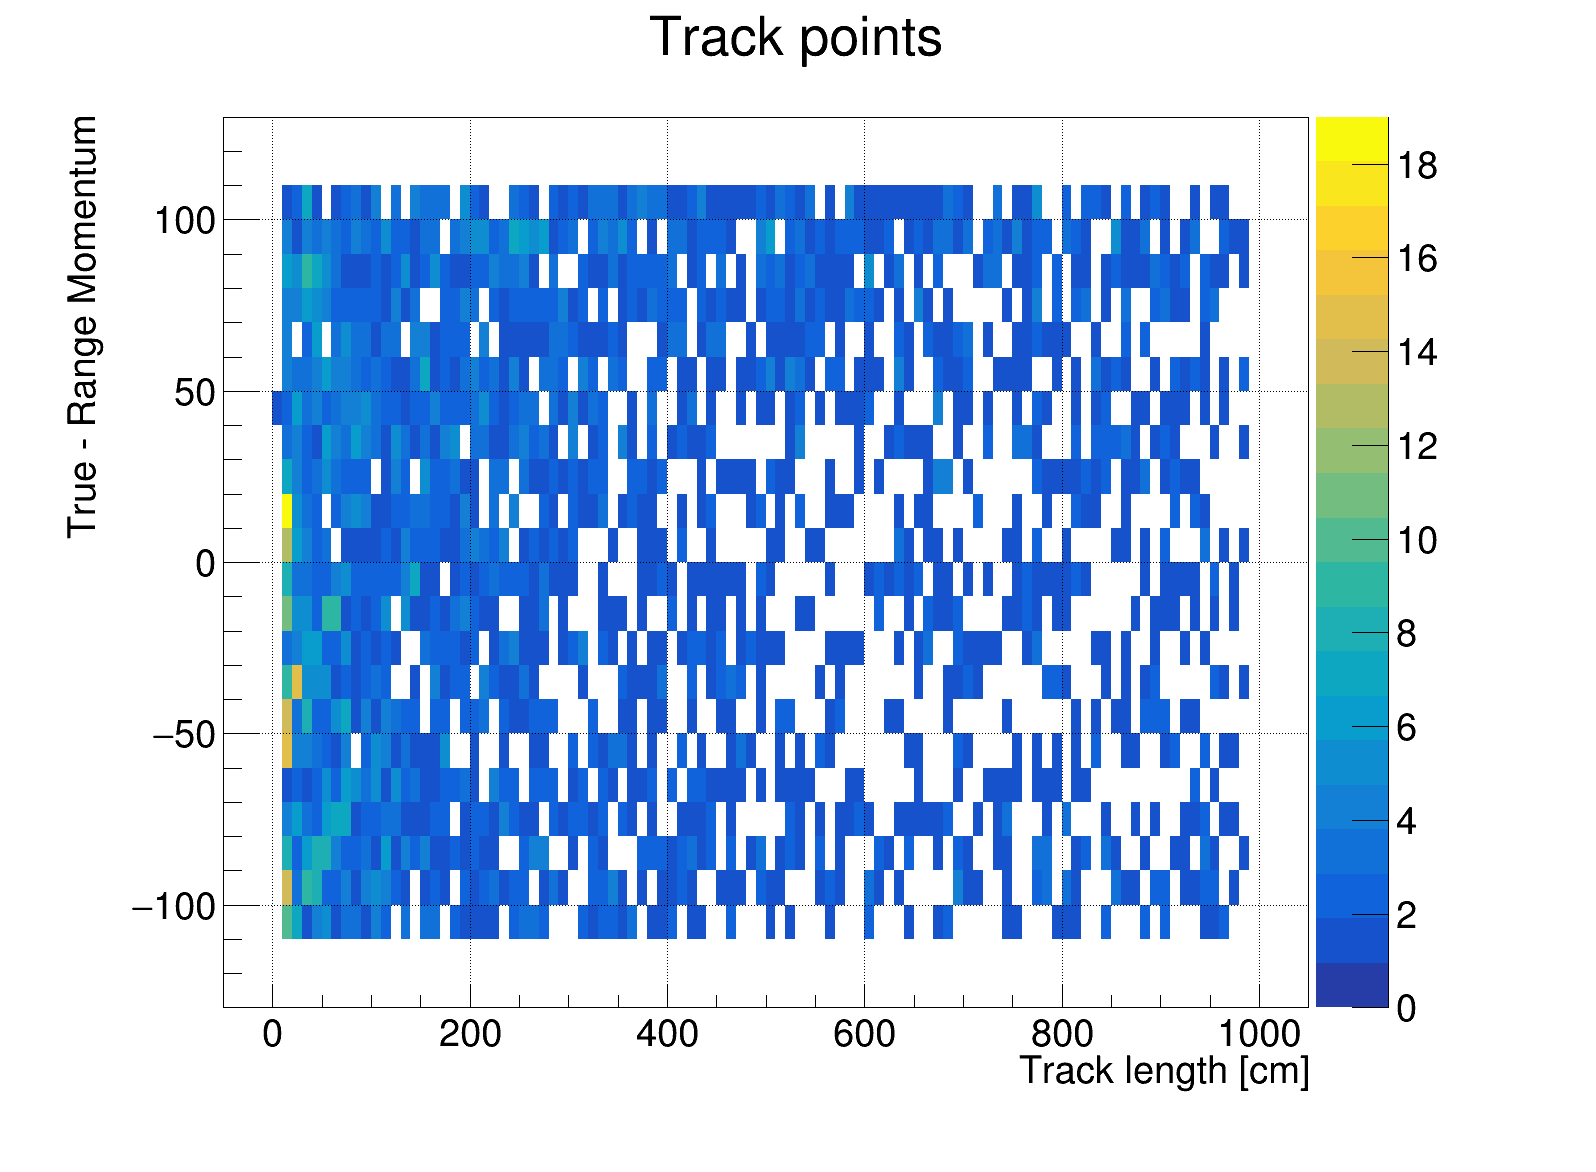

In [33]:
title = 'Track points'
xbin = 110
xstart = -50
xend = 1050
ybin = 26
ystart = -130
yend = 130
event_nr = 7
data_set = dirt_out
cut = 'fidVol && TrackLength>8 && crt_tom_cut && muon'
#cut = '1'
h_2d_Pnt = ROOT.TH2F("h_2d_Pnt", title, xbin,xstart,xend,ybin,ystart,yend)
h_2d_Pnt.SetXTitle("Track length [cm]")
h_2d_Pnt.SetYTitle("True - Range Momentum")
data_set.Draw('Nu_Vy_sce:Nu_Vz_sce>>h_2d_Pnt',cut,'')
h_2d_Pnt.Draw('colz')
c1.SetLogy(0)
c1.Draw()
print 'Events in the file:', data_set.GetEntries(),' with number of Piont:', h_2d_Pnt.GetEntries()
#c1.SaveAs(outputdir_png + "h_range_contained_tracklength.png")
#c1.SaveAs(outputdir_root + "h_range_contained_tracklength.root")


Events in the file: 302777  with number of Piont: 8156.0


Warning in <TROOT::Append>: Replacing existing TH1: h_2d_Pnt (Potential memory leak).


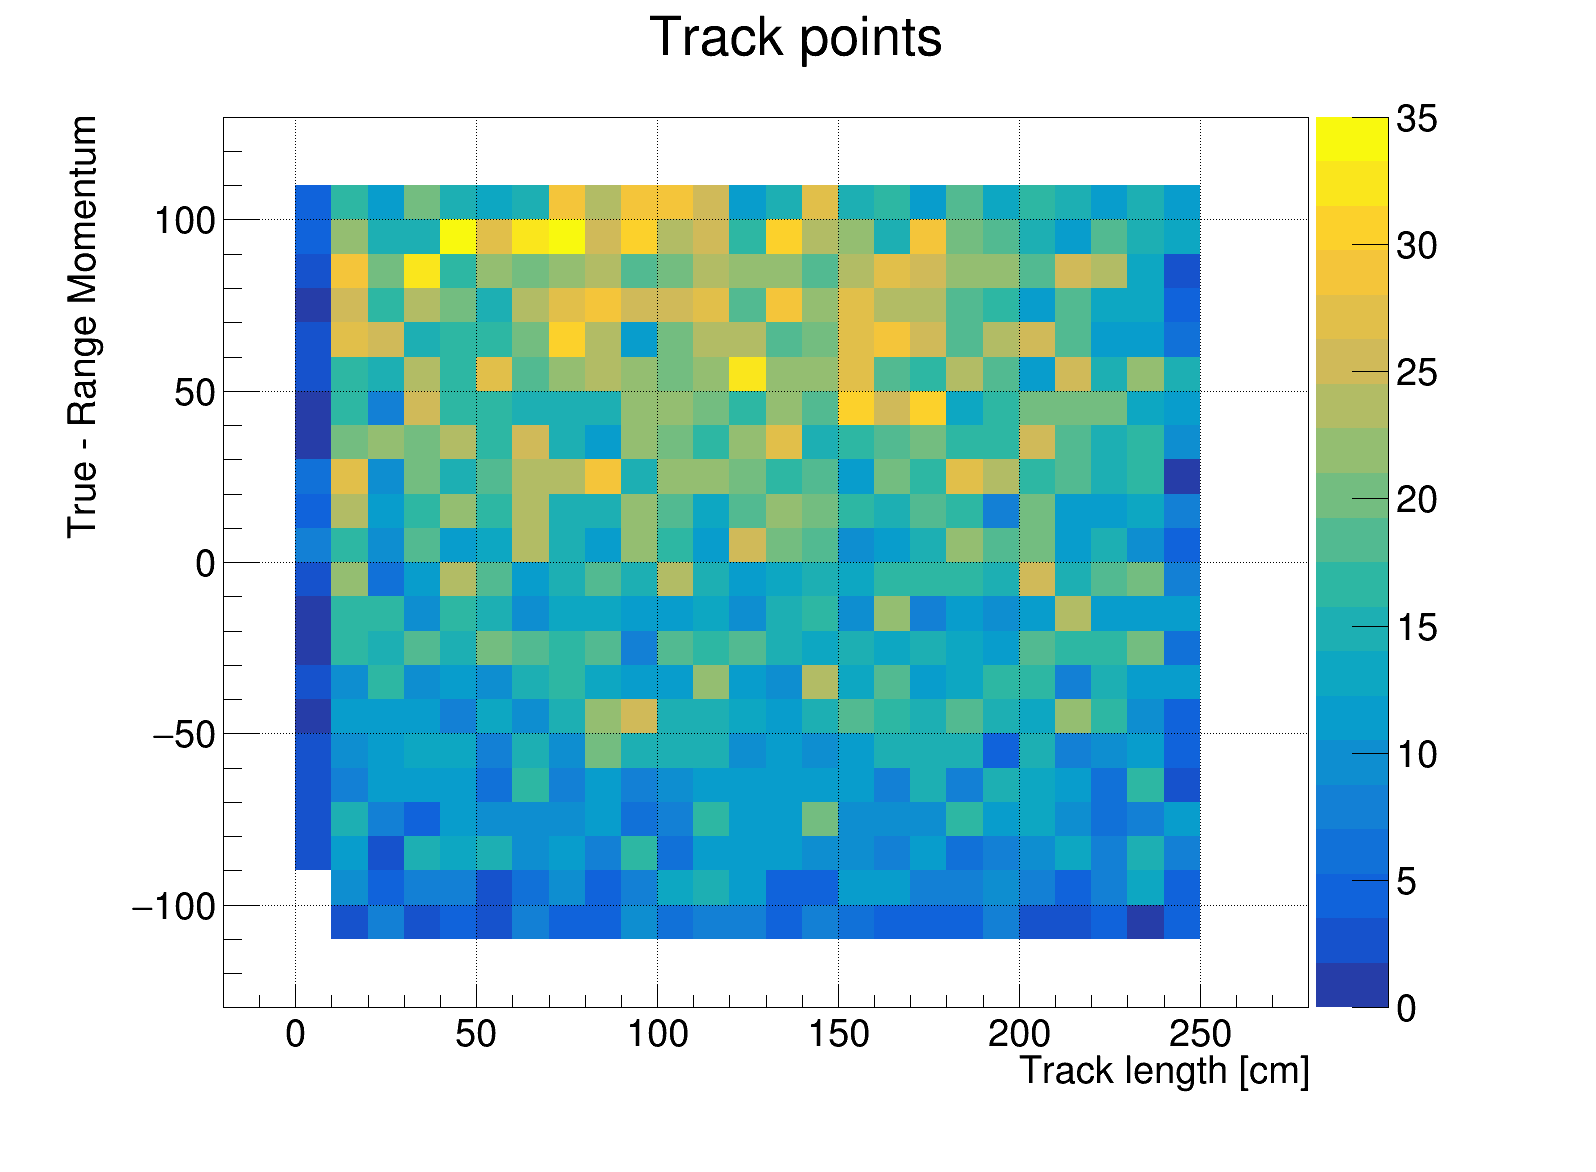

In [34]:
title = 'Track points'
xbin = 30
xstart = -20
xend = 280
ybin = 26
ystart = -130
yend = 130
event_nr = 7
data_set = ext_out
cut = 'fidVol && TrackLength>8 && crt_tom_cut && muon'
#cut = '1'
h_2d_Pnt = ROOT.TH2F("h_2d_Pnt", title, xbin,xstart,xend,ybin,ystart,yend)
h_2d_Pnt.SetXTitle("Track length [cm]")
h_2d_Pnt.SetYTitle("True - Range Momentum")
data_set.Draw('Nu_Vy_sce:Nu_Vx_sce>>h_2d_Pnt',cut,'')
h_2d_Pnt.Draw('colz')
c1.SetLogy(0)
c1.Draw()
print 'Events in the file:', data_set.GetEntries(),' with number of Piont:', h_2d_Pnt.GetEntries()
#c1.SaveAs(outputdir_png + "h_range_contained_tracklength.png")
#c1.SaveAs(outputdir_root + "h_range_contained_tracklength.root")


Events in the file: 967267  with number of Piont: 226294.0


Warning in <TROOT::Append>: Replacing existing TH1: h_2d_Pnt (Potential memory leak).


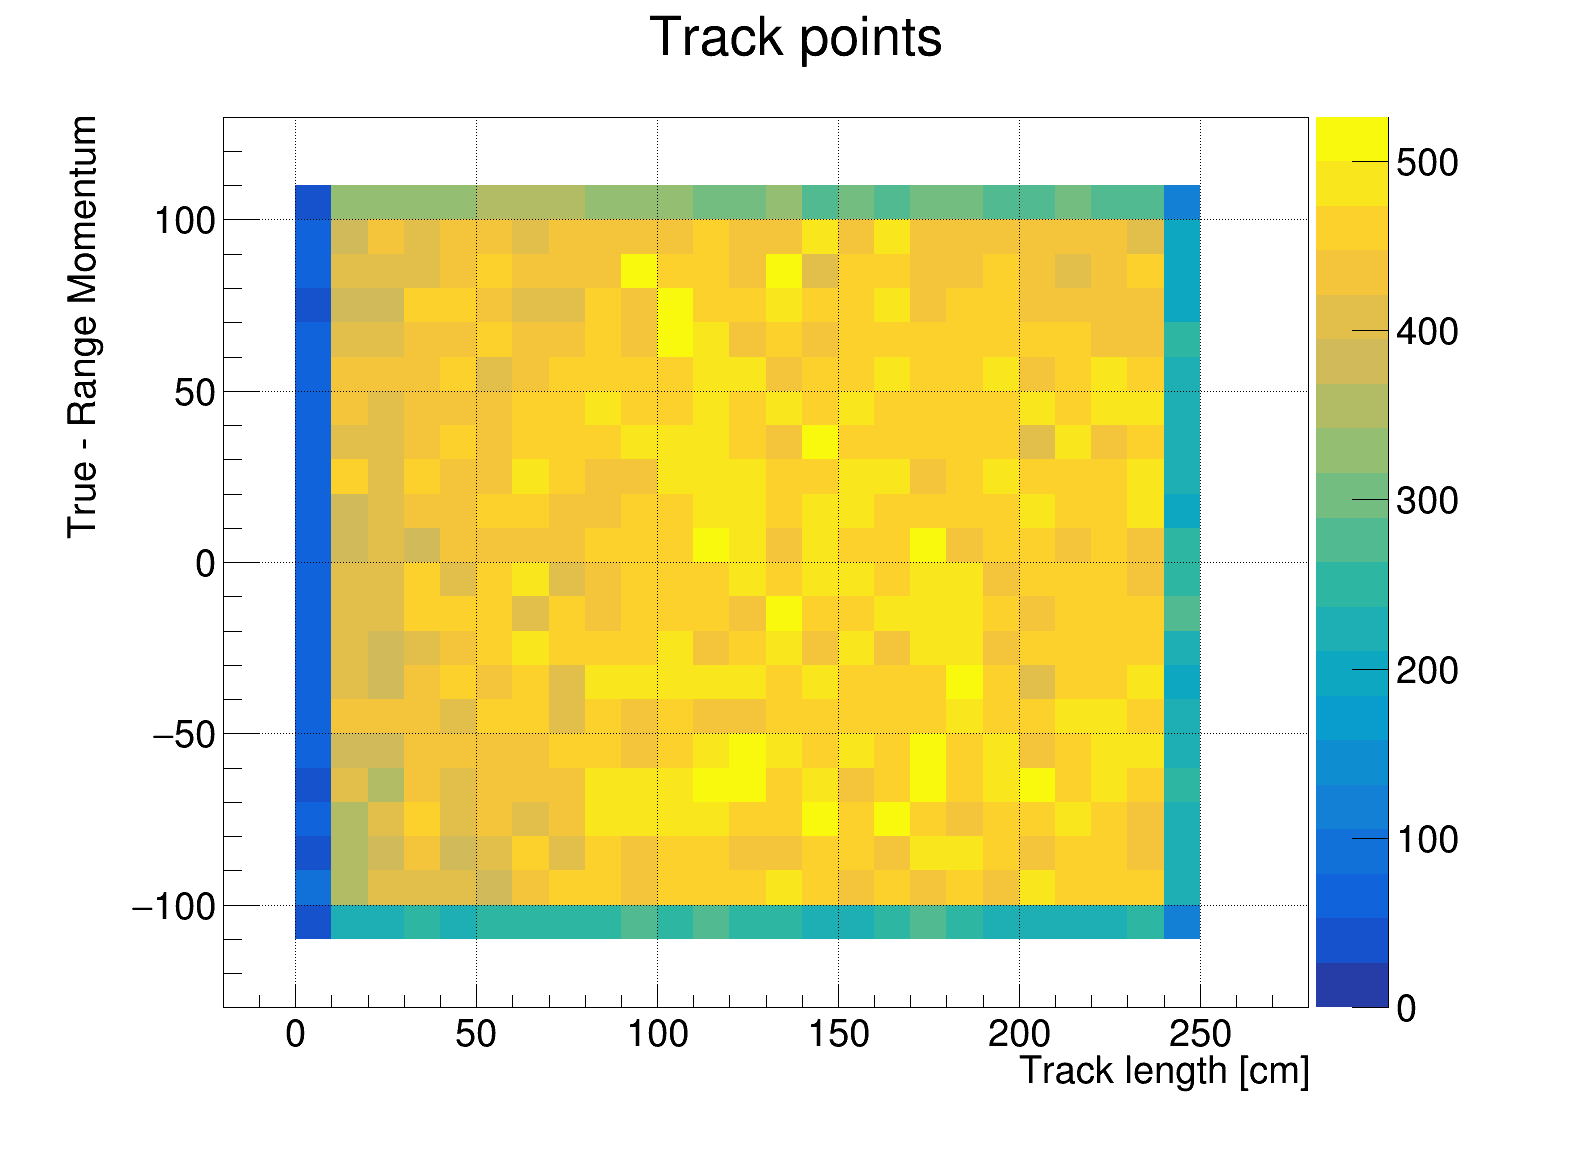

In [35]:
title = 'Track points'
xbin = 30
xstart = -20
xend = 280
ybin = 26
ystart = -130
yend = 130
event_nr = 7
data_set = overlay_out
cut = 'fidVol && TrackLength>8 && crt_tom_cut && muon'
#cut = '1'
h_2d_Pnt = ROOT.TH2F("h_2d_Pnt", title, xbin,xstart,xend,ybin,ystart,yend)
h_2d_Pnt.SetXTitle("Track length [cm]")
h_2d_Pnt.SetYTitle("True - Range Momentum")
data_set.Draw('Nu_Vy_sce:Nu_Vx_sce>>h_2d_Pnt',cut,'')
h_2d_Pnt.Draw('colz')
c1.SetLogy(0)
c1.Draw()
print 'Events in the file:', data_set.GetEntries(),' with number of Piont:', h_2d_Pnt.GetEntries()
#c1.SaveAs(outputdir_png + "h_range_contained_tracklength.png")
#c1.SaveAs(outputdir_root + "h_range_contained_tracklength.root")


In [ ]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && muon && cos(TrackTheta)>0"
zahler_cut = "numu_signal && fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && cos(TrackTheta)>0"
cut = 'fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && cos(TrackTheta)>0'

efficiency = overlay.GetEntries(zahler_cut)*100.0/overlay.GetEntries(nenner_cut)
purity = overlay.GetEntries(cut+' && numu_signal')*scale[overlay]*100/NuCC.getTotNum(cut)

print 'Efficiency:\t{0:0.2f}%'.format(efficiency)
print 'Purity:\t\t{0:0.2f}%'.format(  purity)

nenner_cut2 = "numu_signal && muon && cos(TrackTheta)<0"
zahler_cut2 = "numu_signal && fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && cos(TrackTheta)<0"
cut2 = 'fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && cos(TrackTheta)<0'

efficiency2 = overlay.GetEntries(zahler_cut2)*100.0/overlay.GetEntries(nenner_cut2)
purity2 = overlay.GetEntries(cut2+' && numu_signal')*scale[overlay]*100/NuCC.getTotNum(cut2)

print 'Efficiency 2:\t{0:0.2f}%'.format(efficiency2)
print 'Purity 2:\t\t{0:0.2f}%'.format(  purity2)


name = '_Wouter_forBackward_reco'
title = 'After Wouters cut (forw/backw):'
title = title+' Eff/Pur={0:0.2f}%'.format( efficiency)+'/{0:0.2f}%'.format(purity)+' Eff2/Pur2={0:0.2f}%'.format( efficiency2)+'/{0:0.2f}%'.format(purity2)

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)

h_init_eff_energy2 = ROOT.TH1F("h_init_eff_energy2",title,xbin,xstart,xend)
h_init_eff_energy_12 = ROOT.TH1F("h_init_eff_energy_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy2',zahler_cut2)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_12',nenner_cut2)
h_init_eff_energy_12.Sumw2()
h_init_eff_energy2.Divide(h_init_eff_energy_12)
h_init_eff_energy2.Scale(100)
h_init_eff_energy2.SetLineColor(2)

h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth neutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
h_init_eff_energy2.Draw("same")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_energy"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_energy"+name+".root")


xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta",title,xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1",title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)

h_init_eff_theta2 = ROOT.TH1F("h_init_eff_theta2",title,xbin,xstart,xend)
h_init_eff_theta_12 = ROOT.TH1F("h_init_eff_theta_12",title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta2',zahler_cut2)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_12',nenner_cut2)
h_init_eff_theta_12.Sumw2()
h_init_eff_theta2.Divide(h_init_eff_theta_12)
h_init_eff_theta2.Scale(100)
h_init_eff_theta2.SetLineColor(2)

h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth lepton cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
h_init_eff_theta2.Draw("same E")

c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_theta"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_theta"+name+".root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi",title,xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1",title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)

h_init_eff_phi2 = ROOT.TH1F("h_init_eff_phi2",title,xbin,xstart,xend)
h_init_eff_phi_12 = ROOT.TH1F("h_init_eff_phi_12",title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi2',zahler_cut2)
overlay.Draw('TrackPhi>>h_init_eff_phi_12',nenner_cut2)
h_init_eff_phi_12.Sumw2()
h_init_eff_phi2.Divide(h_init_eff_phi_12)
h_init_eff_phi2.Scale(100)
h_init_eff_phi2.SetLineColor(2)

h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco lepton phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
h_init_eff_phi2.Draw("same e")

c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_phi"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_phi"+name+".root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vx>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vx"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vx"+name+".root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vy>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vy"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vy"+name+".root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vz>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vz"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vz"+name+".root")



In [ ]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && muon && !track_end_uncontained"
zahler_cut = "numu_signal && fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && !track_end_uncontained"
cut = 'fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && !track_end_uncontained'

efficiency = overlay.GetEntries(zahler_cut)*100.0/overlay.GetEntries(nenner_cut)
purity = overlay.GetEntries(cut+' && numu_signal')*scale[overlay]*100/NuCC.getTotNum(cut)

print 'Efficiency:\t{0:0.2f}%'.format(efficiency)
print 'Purity:\t\t{0:0.2f}%'.format(  purity)

nenner_cut2 = "numu_signal && muon && track_end_uncontained"
zahler_cut2 = "numu_signal && fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && track_end_uncontained"
cut2 = 'fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && track_end_uncontained'

efficiency2 = overlay.GetEntries(zahler_cut2)*100.0/overlay.GetEntries(nenner_cut2)
purity2 = overlay.GetEntries(cut2+' && numu_signal')*scale[overlay]*100/NuCC.getTotNum(cut2)

print 'Efficiency 2:\t{0:0.2f}%'.format(efficiency2)
print 'Purity 2:\t\t{0:0.2f}%'.format(  purity2)


name = '_Wouter_contained'
title = 'After Wouters cut (track_end_uncontained/!):'
title = title+' Eff/Pur={0:0.2f}%'.format( efficiency)+'/{0:0.2f}%'.format(purity)+' Eff2/Pur2={0:0.2f}%'.format( efficiency2)+'/{0:0.2f}%'.format(purity2)

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)

h_init_eff_energy2 = ROOT.TH1F("h_init_eff_energy2",title,xbin,xstart,xend)
h_init_eff_energy_12 = ROOT.TH1F("h_init_eff_energy_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy2',zahler_cut2)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_12',nenner_cut2)
h_init_eff_energy_12.Sumw2()
h_init_eff_energy2.Divide(h_init_eff_energy_12)
h_init_eff_energy2.Scale(100)
h_init_eff_energy2.SetLineColor(2)

h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth neutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
h_init_eff_energy2.Draw("same")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_energy"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_energy"+name+".root")


xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta",title,xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1",title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)

h_init_eff_theta2 = ROOT.TH1F("h_init_eff_theta2",title,xbin,xstart,xend)
h_init_eff_theta_12 = ROOT.TH1F("h_init_eff_theta_12",title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta2',zahler_cut2)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_12',nenner_cut2)
h_init_eff_theta_12.Sumw2()
h_init_eff_theta2.Divide(h_init_eff_theta_12)
h_init_eff_theta2.Scale(100)
h_init_eff_theta2.SetLineColor(2)

h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth lepton cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
h_init_eff_theta2.Draw("same E")

c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_theta"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_theta"+name+".root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi",title,xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1",title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)

h_init_eff_phi2 = ROOT.TH1F("h_init_eff_phi2",title,xbin,xstart,xend)
h_init_eff_phi_12 = ROOT.TH1F("h_init_eff_phi_12",title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi2',zahler_cut2)
overlay.Draw('TrackPhi>>h_init_eff_phi_12',nenner_cut2)
h_init_eff_phi_12.Sumw2()
h_init_eff_phi2.Divide(h_init_eff_phi_12)
h_init_eff_phi2.Scale(100)
h_init_eff_phi2.SetLineColor(2)

h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco lepton phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
h_init_eff_phi2.Draw("same e")

c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_phi"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_phi"+name+".root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vx>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vx"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vx"+name+".root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vy>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vy"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vy"+name+".root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vz>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vz"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vz"+name+".root")



In [ ]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && muon && NuTracks==1"
zahler_cut = "numu_signal && fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && NuTracks==1"
cut = 'fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && NuTracks==1'

#efficiency = overlay.GetEntries(zahler_cut)*100.0/overlay.GetEntries(nenner_cut)
#purity = overlay.GetEntries(cut+' && numu_signal')*scale[overlay]*100/NuCC.getTotNum(cut)

print 'Efficiency:\t{0:0.2f}%'.format(efficiency)
print 'Purity:\t\t{0:0.2f}%'.format(  purity)

nenner_cut2 = "numu_signal && muon && NuTracks>1"
zahler_cut2 = "numu_signal && fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && NuTracks>1"
cut2 = 'fidVol && muon && TrackScore>0.8 && TrackPID_chimuon<60 && TrackPID_chiproton>40 && (TrackPID_chiproton/TrackPID_chimuon)>2 && VtxDistance<5 && NuScore>0.06 && (FlashScore<10 || NuScore>0.25) && NuTracks>1'

#efficiency2 = overlay.GetEntries(zahler_cut2)*100.0/overlay.GetEntries(nenner_cut2)
#purity2 = overlay.GetEntries(cut2+' && numu_signal')*scale[overlay]*100/NuCC.getTotNum(cut2)

print 'Efficiency 2:\t{0:0.2f}%'.format(efficiency2)
print 'Purity 2:\t\t{0:0.2f}%'.format(  purity2)


name = '_Wouter_NuTracks'
title = 'After Wouters cut (NuTracks=/>1):'
title = title+' Eff/Pur={0:0.2f}%'.format( efficiency)+'/{0:0.2f}%'.format(purity)+' Eff2/Pur2={0:0.2f}%'.format( efficiency2)+'/{0:0.2f}%'.format(purity2)

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)

h_init_eff_energy2 = ROOT.TH1F("h_init_eff_energy2",title,xbin,xstart,xend)
h_init_eff_energy_12 = ROOT.TH1F("h_init_eff_energy_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy2',zahler_cut2)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_12',nenner_cut2)
h_init_eff_energy_12.Sumw2()
h_init_eff_energy2.Divide(h_init_eff_energy_12)
h_init_eff_energy2.Scale(100)
h_init_eff_energy2.SetLineColor(2)

h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth neutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
h_init_eff_energy2.Draw("same")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_energy"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_energy"+name+".root")


xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta",title,xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1",title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)

h_init_eff_theta2 = ROOT.TH1F("h_init_eff_theta2",title,xbin,xstart,xend)
h_init_eff_theta_12 = ROOT.TH1F("h_init_eff_theta_12",title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta2',zahler_cut2)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_12',nenner_cut2)
h_init_eff_theta_12.Sumw2()
h_init_eff_theta2.Divide(h_init_eff_theta_12)
h_init_eff_theta2.Scale(100)
h_init_eff_theta2.SetLineColor(2)

h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth lepton cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
h_init_eff_theta2.Draw("same E")

c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_theta"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_theta"+name+".root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi",title,xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1",title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)

h_init_eff_phi2 = ROOT.TH1F("h_init_eff_phi2",title,xbin,xstart,xend)
h_init_eff_phi_12 = ROOT.TH1F("h_init_eff_phi_12",title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi2',zahler_cut2)
overlay.Draw('TrackPhi>>h_init_eff_phi_12',nenner_cut2)
h_init_eff_phi_12.Sumw2()
h_init_eff_phi2.Divide(h_init_eff_phi_12)
h_init_eff_phi2.Scale(100)
h_init_eff_phi2.SetLineColor(2)

h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco lepton phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
h_init_eff_phi2.Draw("same e")

c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_phi"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_phi"+name+".root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vx>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vx"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vx"+name+".root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vy>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vy"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vy"+name+".root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)

h_init_eff_V2 = ROOT.TH1F("h_init_eff_V2",title,xbin,xstart,xend)
h_init_eff_V_12 = ROOT.TH1F("h_init_eff_V_12",title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V2',zahler_cut2)
overlay.Draw('MCNu_Vz>>h_init_eff_V_12',nenner_cut2)
h_init_eff_V_12.Sumw2()
h_init_eff_V2.Divide(h_init_eff_V_12)
h_init_eff_V2.Scale(100)
h_init_eff_V2.SetLineColor(2)

h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
h_init_eff_V2.Draw("same e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_Vz"+name+".png")
c1.SaveAs(outputdir_root + "h_eff_Vz"+name+".root")

